In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
%matplotlib inline

# from Lawrence/Turnbaugh Diet Intervention Paper (2012)

In [3]:
human_metadata = pd.read_csv('../data/David_Turnbaugh_2012Data/basic_metadata.csv', index_col=0)
human_metadata.head()

,Subject/Food,Diet,Day
Sample ID,,,
ID63,1,Animal,-4.0
ID92,1,Animal,-3.0
ID265,1,Animal,-2.0
ID58,1,Animal,-1.0
ID46,1,Animal,0.0


In [4]:
human_metadata.columns

Index(['Subject/Food', 'Diet', 'Day'], dtype='object')

## braycurtis

In [5]:
human_bc_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_braycurtis.tsv', sep='\t', index_col=0)
human_bc_dm.head()

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
DD1,0.000000,0.672067,0.827358,0.701383,0.637093,0.747862,0.682725,0.656977,0.638600,0.846004,...,0.638185,0.660316,0.808366,0.644661,0.683088,0.663175,0.719737,0.794360,0.770056,0.700210
DD10,0.672067,0.000000,0.560873,0.499754,0.423690,0.459530,0.423157,0.255965,0.481758,0.559745,...,0.355831,0.455704,0.545875,0.371346,0.496559,0.526341,0.456795,0.577203,0.537777,0.308323
DD100,0.827358,0.560873,0.000000,0.620569,0.616096,0.614544,0.610060,0.550567,0.623721,0.243582,...,0.574645,0.563064,0.254731,0.608977,0.664847,0.663082,0.547046,0.368356,0.687483,0.571041
DD101,0.701383,0.499754,0.620569,0.000000,0.310613,0.561766,0.404497,0.501855,0.527049,0.607295,...,0.509350,0.584791,0.611529,0.497413,0.556220,0.570512,0.599759,0.600860,0.633445,0.505823
DD102,0.637093,0.423690,0.616096,0.310613,0.000000,0.538686,0.366838,0.421768,0.482883,0.613952,...,0.472555,0.534196,0.611778,0.456879,0.502058,0.536862,0.543430,0.593309,0.616696,0.479195


In [6]:
named_bc_dm = pd.merge(human_metadata, human_bc_dm, left_index=True, right_index=True)
named_bc_dm.head()

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
ID63,1,Animal,-4.0,0.685729,0.534271,0.671121,0.569827,0.539595,0.554837,0.534966,...,0.484836,0.604941,0.668585,0.498711,0.494687,0.162134,0.611559,0.647229,0.582347,0.522006
ID92,1,Animal,-3.0,0.663175,0.526341,0.663082,0.570512,0.536862,0.548663,0.515880,...,0.479547,0.593628,0.652135,0.481993,0.484816,0.000000,0.618242,0.637085,0.588811,0.536373
ID265,1,Animal,-2.0,0.638949,0.478594,0.629048,0.520507,0.491660,0.511367,0.482581,...,0.430031,0.534332,0.607344,0.452113,0.470653,0.228410,0.546979,0.603840,0.540654,0.459073
ID58,1,Animal,-1.0,0.677651,0.558534,0.691357,0.578433,0.563225,0.564083,0.550626,...,0.492486,0.611839,0.680205,0.514934,0.513777,0.171371,0.631808,0.664545,0.611062,0.534080
ID46,1,Animal,0.0,0.684897,0.509587,0.669861,0.505728,0.500858,0.536501,0.494135,...,0.476484,0.604571,0.656236,0.466328,0.471242,0.217806,0.602946,0.636224,0.572137,0.520826


In [7]:
named_bc_dm['group_time'] = named_bc_dm['Subject/Food'].astype(str) + "_" + named_bc_dm['Diet'].astype(str) + '_' + named_bc_dm['Day'].astype(str)

In [8]:
gt_bc_dm = named_bc_dm[['group_time']].copy()
gt_bc_dm.head()

,group_time
ID63,1_Animal_-4.0
ID92,1_Animal_-3.0
ID265,1_Animal_-2.0
ID58,1_Animal_-1.0
ID46,1_Animal_0.0


In [9]:
named_bc_dm = named_bc_dm.set_index('group_time')
named_bc_dm

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,1,Animal,-4.0,0.685729,0.534271,0.671121,0.569827,0.539595,0.554837,0.534966,...,0.484836,0.604941,0.668585,0.498711,0.494687,0.162134,0.611559,0.647229,0.582347,0.522006
1_Animal_-3.0,1,Animal,-3.0,0.663175,0.526341,0.663082,0.570512,0.536862,0.548663,0.515880,...,0.479547,0.593628,0.652135,0.481993,0.484816,0.000000,0.618242,0.637085,0.588811,0.536373
1_Animal_-2.0,1,Animal,-2.0,0.638949,0.478594,0.629048,0.520507,0.491660,0.511367,0.482581,...,0.430031,0.534332,0.607344,0.452113,0.470653,0.228410,0.546979,0.603840,0.540654,0.459073
1_Animal_-1.0,1,Animal,-1.0,0.677651,0.558534,0.691357,0.578433,0.563225,0.564083,0.550626,...,0.492486,0.611839,0.680205,0.514934,0.513777,0.171371,0.631808,0.664545,0.611062,0.534080
1_Animal_0.0,1,Animal,0.0,0.684897,0.509587,0.669861,0.505728,0.500858,0.536501,0.494135,...,0.476484,0.604571,0.656236,0.466328,0.471242,0.217806,0.602946,0.636224,0.572137,0.520826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,11,Animal,6.0,0.666190,0.616320,0.757480,0.643922,0.604988,0.613997,0.551007,...,0.584096,0.636411,0.718084,0.534553,0.320040,0.543747,0.650598,0.691044,0.541070,0.580010
11_Animal_7.0,11,Animal,7.0,0.646567,0.520610,0.680965,0.580792,0.522383,0.554946,0.471212,...,0.508058,0.559401,0.651735,0.458849,0.248858,0.495339,0.571521,0.631652,0.526701,0.517907
11_Animal_8.0,11,Animal,8.0,0.660197,0.429395,0.561522,0.500714,0.451947,0.487404,0.413992,...,0.431991,0.479198,0.533165,0.404452,0.275422,0.455674,0.493026,0.525974,0.499362,0.421277


In [10]:
named_bc_dm2 = named_bc_dm.drop(columns=['Subject/Food', 'Diet', 'Day'])
named_bc_dm2

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,0.685729,0.534271,0.671121,0.569827,0.539595,0.554837,0.534966,0.542285,0.330050,0.682608,...,0.484836,0.604941,0.668585,0.498711,0.494687,0.162134,0.611559,0.647229,0.582347,0.522006
1_Animal_-3.0,0.663175,0.526341,0.663082,0.570512,0.536862,0.548663,0.515880,0.530286,0.301444,0.683900,...,0.479547,0.593628,0.652135,0.481993,0.484816,0.000000,0.618242,0.637085,0.588811,0.536373
1_Animal_-2.0,0.638949,0.478594,0.629048,0.520507,0.491660,0.511367,0.482581,0.477020,0.349849,0.646161,...,0.430031,0.534332,0.607344,0.452113,0.470653,0.228410,0.546979,0.603840,0.540654,0.459073
1_Animal_-1.0,0.677651,0.558534,0.691357,0.578433,0.563225,0.564083,0.550626,0.563408,0.344626,0.708213,...,0.492486,0.611839,0.680205,0.514934,0.513777,0.171371,0.631808,0.664545,0.611062,0.534080
1_Animal_0.0,0.684897,0.509587,0.669861,0.505728,0.500858,0.536501,0.494135,0.516978,0.326826,0.670359,...,0.476484,0.604571,0.656236,0.466328,0.471242,0.217806,0.602946,0.636224,0.572137,0.520826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,0.666190,0.616320,0.757480,0.643922,0.604988,0.613997,0.551007,0.639693,0.568028,0.759344,...,0.584096,0.636411,0.718084,0.534553,0.320040,0.543747,0.650598,0.691044,0.541070,0.580010
11_Animal_7.0,0.646567,0.520610,0.680965,0.580792,0.522383,0.554946,0.471212,0.538049,0.497202,0.685236,...,0.508058,0.559401,0.651735,0.458849,0.248858,0.495339,0.571521,0.631652,0.526701,0.517907
11_Animal_8.0,0.660197,0.429395,0.561522,0.500714,0.451947,0.487404,0.413992,0.432627,0.449259,0.570139,...,0.431991,0.479198,0.533165,0.404452,0.275422,0.455674,0.493026,0.525974,0.499362,0.421277


In [11]:
rn_bc_dm = pd.merge(named_bc_dm2.T, gt_bc_dm, left_index=True, right_index=True)
rn_bc_dm2 = rn_bc_dm.set_index('group_time')
rn_bc_dm2

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.534271,0.526341,0.478594,0.558534,0.509587,0.537171,0.541171,0.683427,0.673915,0.462569,...,0.489843,0.451352,0.551949,0.496559,0.537083,0.616320,0.520610,0.429395,0.469876,0.488739
8_Plant_5.0,0.539595,0.536862,0.491660,0.563225,0.500858,0.539323,0.578705,0.703586,0.679295,0.537341,...,0.492416,0.464501,0.523974,0.502058,0.569670,0.604988,0.522383,0.451947,0.454383,0.457092
2_Plant_5.0,0.534966,0.515880,0.482581,0.550626,0.494135,0.532830,0.552947,0.680642,0.650889,0.527305,...,0.439387,0.416961,0.491681,0.440984,0.534586,0.551007,0.471212,0.413992,0.408978,0.437502
9_Plant_4.0,0.542285,0.530286,0.477020,0.563408,0.516978,0.548954,0.565688,0.729508,0.711740,0.479896,...,0.501719,0.464267,0.567827,0.523914,0.559479,0.639693,0.538049,0.432627,0.480467,0.495692
1_Plant_5.0,0.330050,0.301444,0.349849,0.344626,0.326826,0.323094,0.478744,0.536545,0.529603,0.401560,...,0.496757,0.483528,0.508029,0.501595,0.511898,0.568028,0.497202,0.449259,0.492519,0.441562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_Animal_-3.0,0.162134,0.000000,0.228410,0.171371,0.217806,0.212697,0.403426,0.471469,0.439970,0.409154,...,0.475693,0.472173,0.488981,0.484816,0.494492,0.543747,0.495339,0.455674,0.493554,0.469752
10_Animal_-4.0,0.611559,0.618242,0.546979,0.631808,0.602946,0.617933,0.596880,0.727442,0.701749,0.517576,...,0.547886,0.524783,0.588863,0.554707,0.569663,0.650598,0.571521,0.493026,0.534991,0.587097
6_Animal_7.0,0.647229,0.637085,0.603840,0.664545,0.636224,0.654084,0.601688,0.780022,0.753664,0.520244,...,0.627040,0.583960,0.648833,0.628200,0.595955,0.691044,0.631652,0.525974,0.598482,0.581611


In [12]:
al_bc_dm = rn_bc_dm2.filter(regex='Plant', axis=0)
alt_bc_dm = al_bc_dm.filter(regex='Animal', axis=1)
alt_bc_dm.shape

(115, 121)

In [13]:
alt_bc_dm.head()

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.534271,0.526341,0.478594,0.558534,0.509587,0.537171,0.541171,0.683427,0.673915,0.462569,...,0.489843,0.451352,0.551949,0.496559,0.537083,0.616320,0.520610,0.429395,0.469876,0.488739
8_Plant_5.0,0.539595,0.536862,0.491660,0.563225,0.500858,0.539323,0.578705,0.703586,0.679295,0.537341,...,0.492416,0.464501,0.523974,0.502058,0.569670,0.604988,0.522383,0.451947,0.454383,0.457092
2_Plant_5.0,0.534966,0.515880,0.482581,0.550626,0.494135,0.532830,0.552947,0.680642,0.650889,0.527305,...,0.439387,0.416961,0.491681,0.440984,0.534586,0.551007,0.471212,0.413992,0.408978,0.437502
9_Plant_4.0,0.542285,0.530286,0.477020,0.563408,0.516978,0.548954,0.565688,0.729508,0.711740,0.479896,...,0.501719,0.464267,0.567827,0.523914,0.559479,0.639693,0.538049,0.432627,0.480467,0.495692
1_Plant_5.0,0.330050,0.301444,0.349849,0.344626,0.326826,0.323094,0.478744,0.536545,0.529603,0.401560,...,0.496757,0.483528,0.508029,0.501595,0.511898,0.568028,0.497202,0.449259,0.492519,0.441562


In [14]:
bcdm = alt_bc_dm.copy()
bcdm2 = bcdm.stack().reset_index()
bcdm2.columns = ['Plant','Animal','bc_distance']
bcdm2

,Plant,Animal,bc_distance
0,9_Plant_-3.0,1_Animal_-4.0,0.534271
1,9_Plant_-3.0,1_Animal_-3.0,0.526341
2,9_Plant_-3.0,1_Animal_-2.0,0.478594
3,9_Plant_-3.0,1_Animal_-1.0,0.558534
4,9_Plant_-3.0,1_Animal_0.0,0.509587
...,...,...,...
13910,7_Plant_7.0,11_Animal_6.0,0.646541
13911,7_Plant_7.0,11_Animal_7.0,0.604754
13912,7_Plant_7.0,11_Animal_8.0,0.578414
13913,7_Plant_7.0,11_Animal_9.0,0.638308


In [15]:
bcdm2['plant_timepoint'] = bcdm2['Plant'].str.split('_').str[2]
bcdm2['animal_timepoint'] = bcdm2['Animal'].str.split('_').str[2]
bcdm3 = bcdm2.loc[bcdm2['plant_timepoint'] == bcdm2['animal_timepoint']]
bcdm3.head()

,Plant,Animal,bc_distance,plant_timepoint,animal_timepoint
1,9_Plant_-3.0,1_Animal_-3.0,0.526341,-3.0,-3.0
15,9_Plant_-3.0,2_Animal_-3.0,0.422609,-3.0,-3.0
37,9_Plant_-3.0,4_Animal_-3.0,0.490172,-3.0,-3.0
50,9_Plant_-3.0,5_Animal_-3.0,0.511730,-3.0,-3.0
75,9_Plant_-3.0,8_Animal_-3.0,0.478655,-3.0,-3.0


In [16]:
bcdm4 = bcdm3.copy()
bcdm4['plant_patient'] = bcdm4['Plant'].str.split('_').str[0]
bcdm4['animal_patient'] = bcdm4['Animal'].str.split('_').str[0]

In [17]:
bcdm4.bc_distance.values.mean()

0.5545785791650826

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.610e-02 U_stat=1.703e+03
4.0 v.s. 5.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.163e-02 U_stat=3.684e+03
2.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.985e-04 U_stat=1.107e+03
4.0 v.s. 6.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.187e-05 U_stat=3.679e+03
1.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.245e-10 U_stat=8.910e+02
4.0 v.s. 7.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.404e-10 U_stat=3.208e+03
0.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.971e-08 U_stat=7.240e+02
4.0 v.s. 8.0: Mann-Whitney-Wilcoxon test two-sided w

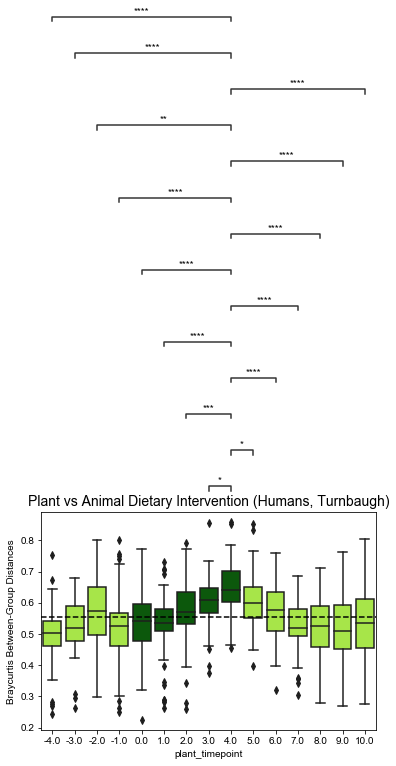

In [63]:
order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
#box_pairs = [ ('-4.0', '4.0'), ('-1.0', '4.0'), ('0.0', '4.0'), ('4.0', '6.0'), ('4.0', '10.0')]
#box_pairs = list(combinations(bcdm4.plant_timepoint.unique(), 2))
box_pairs = [ ('-4.0', '4.0'), ('-3.0', '4.0'), ('-2.0', '4.0'), ('-1.0', '4.0'), ('0.0', '4.0'), 
             ('1.0', '4.0'), ('2.0', '4.0'), ('3.0', '4.0'), ('4.0', '5.0'), ('4.0', '6.0'), 
             ('4.0', '7.0'), ('4.0', '8.0'), ('4.0', '9.0'), ('4.0', '10.0')]
#box_pairs = [ ('-2.0', '-4.0'), ('-2.0', '-3.0'), ('-2.0', '-1.0'), ('-2.0', '0.0'), ('-2.0', '1.0')]
ax = sns.boxplot(x="plant_timepoint", y="bc_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=bcdm4, order=order)
add_stat_annotation(ax, data=bcdm4, x="plant_timepoint", y="bc_distance", order=order,
                    box_pairs=box_pairs, line_offset=0.1,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2);
plt.ylabel('Braycurtis Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.5545785791650826, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_bc_dist_boxplot_sig.svg', dpi=300, bbox_inches="tight")
#Intervention Day 0-4

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Plant vs Animal Dietary Intervention (Humans, Turnbaugh)')

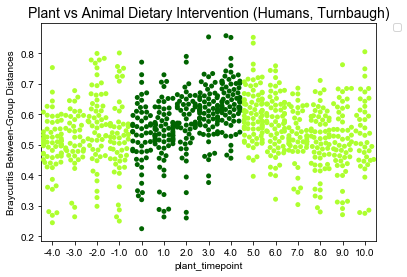

In [19]:
ax = sns.swarmplot(x="plant_timepoint", y="bc_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=bcdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Braycurtis Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)

#Intervention Day 0-4

In [60]:
timez = ['-4.0', '10.0']
bcdm_410 = bcdm4.loc[bcdm4['plant_timepoint'].isin(timez)]
bcdm_410.bc_distance.values.mean()

0.5127495281494616

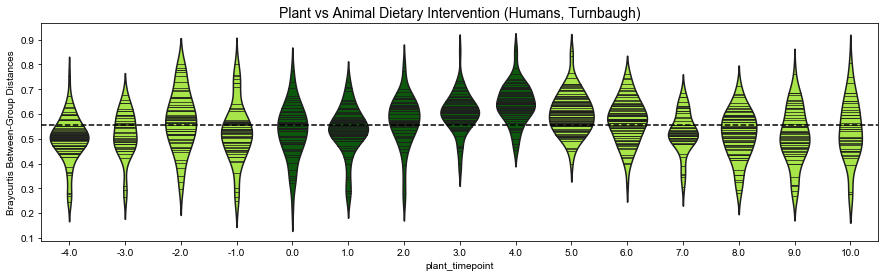

In [20]:
plt.figure(figsize=(15,4))
ax = sns.violinplot(x="plant_timepoint", y="bc_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=bcdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], split=True,
                    scale="count", inner="stick")
plt.ylabel('Braycurtis Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.5545785791650826, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_bc_dist_violinplot.svg', dpi=300, bbox_inches="tight")

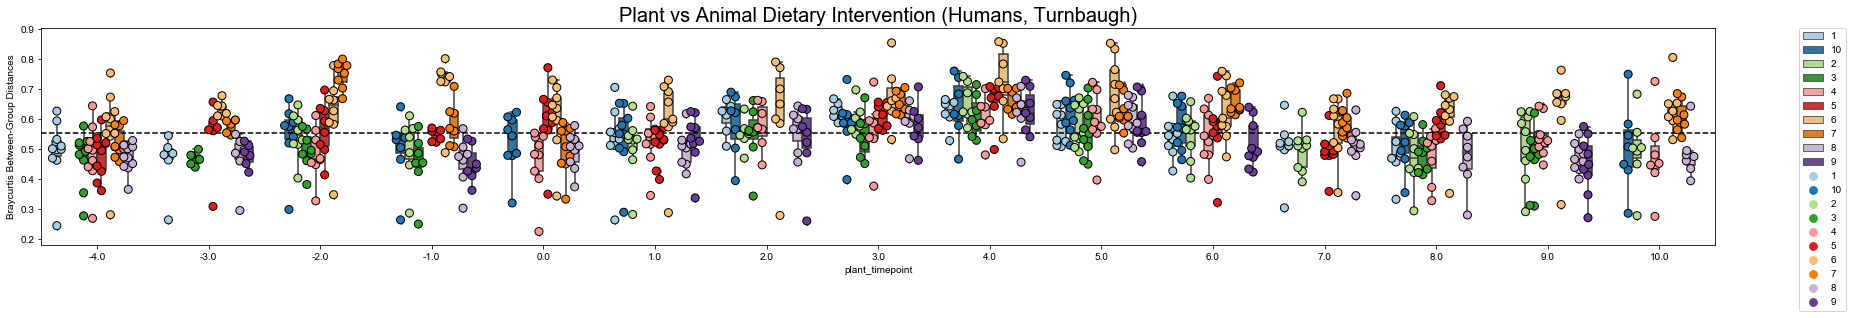

In [21]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="plant_timepoint", y="bc_distance", hue='plant_patient',
                  palette='Paired',
                  data=bcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="plant_timepoint", y="bc_distance", hue='plant_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=bcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Braycurtis Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.5545785791650826, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_bc_dist_boxplot_byP_long_plant.svg', dpi=300, bbox_inches="tight")

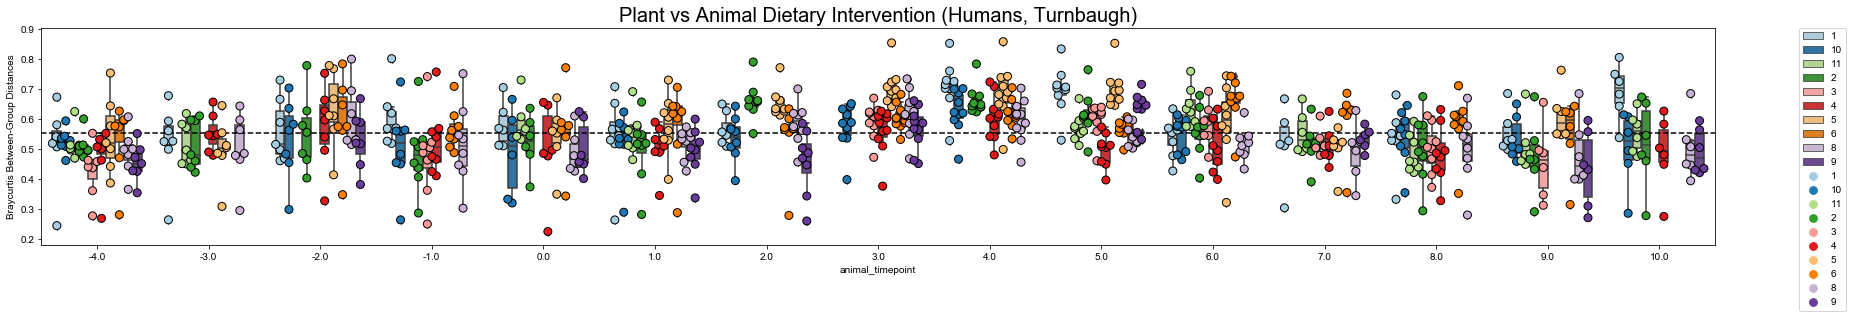

In [22]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="animal_timepoint", y="bc_distance", hue='animal_patient',
                  palette='Paired',
                  data=bcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="animal_timepoint", y="bc_distance", hue='animal_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=bcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Braycurtis Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.5545785791650826, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_bc_dist_boxplot_byP_long_animal.svg', dpi=300, bbox_inches="tight")

In [23]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
bcdm4['Rank'] = bcdm4['plant_timepoint'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
bcdm5 = bcdm4.sort_values(by=['Rank'], axis=0, ascending=True)
bcdm5.plant_timepoint.unique()

array(['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0',
       '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], dtype=object)

<Figure size 1440x288 with 0 Axes>

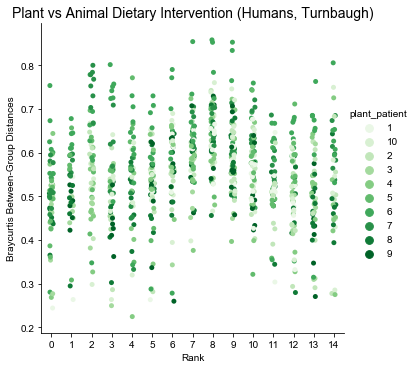

In [24]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="bc_distance", hue='plant_patient', palette='Greens', data=bcdm5)
plt.ylabel('Braycurtis Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

<Figure size 1440x288 with 0 Axes>

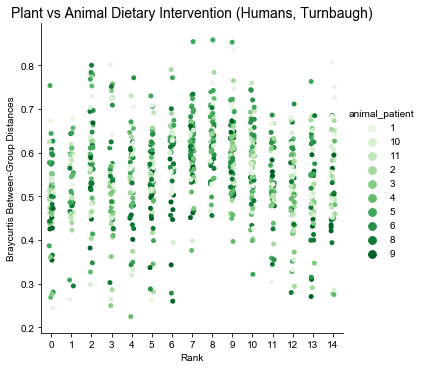

In [25]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="bc_distance", hue='animal_patient', palette='Greens', data=bcdm5)
plt.ylabel('Braycurtis Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

In [26]:
from scipy.stats import wilcoxon
from itertools import combinations

In [27]:
bcdm5

,Plant,Animal,bc_distance,plant_timepoint,animal_timepoint,plant_patient,animal_patient,Rank
4868,1_Plant_-4.0,3_Animal_-4.0,0.462528,-4.0,-4.0,1,3,0
6691,4_Plant_-4.0,4_Animal_-4.0,0.268815,-4.0,-4.0,4,4,0
6683,4_Plant_-4.0,3_Animal_-4.0,0.440460,-4.0,-4.0,4,3,0
6669,4_Plant_-4.0,2_Animal_-4.0,0.496314,-4.0,-4.0,4,2,0
6655,4_Plant_-4.0,1_Animal_-4.0,0.540999,-4.0,-4.0,4,1,0
...,...,...,...,...,...,...,...,...
12694,8_Plant_10.0,10_Animal_10.0,0.494838,10.0,10.0,8,10,14
12682,8_Plant_10.0,9_Animal_10.0,0.434977,10.0,10.0,8,9,14
12672,8_Plant_10.0,8_Animal_10.0,0.394053,10.0,10.0,8,8,14
13287,4_Plant_10.0,9_Animal_10.0,0.421180,10.0,10.0,4,9,14


In [28]:
for key in list(combinations(bcdm5.plant_timepoint.unique(), 2)):
    x = bcdm5[bcdm5["animal_timepoint"] == key[0]].bc_distance.values
    y = bcdm5[bcdm5["animal_timepoint"] == key[1]].bc_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
#    else:
#        t = set(bcdm5[bcdm5["animal_timepoint"] == key[0]].plant_patient)
#        w = set(bcdm5[bcdm5["animal_timepoint"] == key[1]].plant_patient)
#        q = list(t.intersection(w))
#        
#        newdf = bcdm5.loc[bcdm5['plant_patient'].isin(q)]
#        
#        xx = newdf[newdf["animal_timepoint"] == key[0]].bc_distance.values
#        yy = newdf[newdf["animal_timepoint"] == key[1]].bc_distance.values
#        
#        w, p = wilcoxon(xx, yy)
#        print("Combination", key)
#        print(p, w)
#        print("____________________")
#significant combinations 

Combination ('-4.0', '3.0')
1.2186261258831586e-08 269.0
____________________
Combination ('-4.0', '4.0')
9.158924869610856e-13 22.0
____________________
Combination ('-3.0', '10.0')
0.4056948211445802 385.0
____________________
Combination ('-2.0', '-1.0')
0.01376111175767724 496.0
____________________
Combination ('-2.0', '2.0')
1.0 798.0
____________________
Combination ('-1.0', '2.0')
0.004647410549715278 451.0
____________________
Combination ('0.0', '7.0')
0.9211243698669324 731.0
____________________
Combination ('0.0', '9.0')
0.45121314234283616 655.0
____________________
Combination ('1.0', '6.0')
0.02822303574421223 923.0
____________________
Combination ('3.0', '4.0')
0.0015609617773168461 702.0
____________________
Combination ('7.0', '9.0')
0.5553247877681533 674.0
____________________


In [29]:
from scipy.stats import mannwhitneyu

In [30]:
for key in list(combinations(bcdm5.plant_timepoint.unique(), 2)):
    x = bcdm5[bcdm5["plant_timepoint"] == key[0]].bc_distance.values
    y = bcdm5[bcdm5["plant_timepoint"] == key[1]].bc_distance.values
    w, p = mannwhitneyu(x, y)
    print("Combination", key)
    print(p, w)
    print("____________________")

Combination ('-4.0', '-3.0')
0.13374672905426366 1285.0
____________________
Combination ('-4.0', '-2.0')
9.250292676243661e-05 1198.0
____________________
Combination ('-4.0', '-1.0')
0.10574257001215737 1705.0
____________________
Combination ('-4.0', '0.0')
0.023680721264384166 1496.0
____________________
Combination ('-4.0', '1.0')
0.001418613989743761 1788.0
____________________
Combination ('-4.0', '2.0')
9.4538056271574e-07 989.0
____________________
Combination ('-4.0', '3.0')
4.2883988176094275e-12 811.0
____________________
Combination ('-4.0', '4.0')
2.8513160445373415e-16 507.0
____________________
Combination ('-4.0', '5.0')
1.043429020892833e-11 1039.0
____________________
Combination ('-4.0', '6.0')
2.3672967541140666e-06 1398.0
____________________
Combination ('-4.0', '7.0')
0.022042024952666262 1490.0
____________________
Combination ('-4.0', '8.0')
0.11672088987190776 1972.0
____________________
Combination ('-4.0', '9.0')
0.26189957964378274 1763.0
_________________

## Jaccard

In [31]:
human_j_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_jaccard.tsv', sep='\t', index_col=0)
human_j_dm.head()

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
DD1,0.000000,0.849573,0.886406,0.809896,0.780679,0.859504,0.836978,0.831721,0.798054,0.893855,...,0.828780,0.857345,0.898533,0.841150,0.848837,0.844376,0.870345,0.891369,0.891443,0.862719
DD10,0.849573,0.000000,0.676862,0.663537,0.624204,0.609974,0.605114,0.490196,0.662162,0.690885,...,0.577291,0.607390,0.642259,0.578240,0.644279,0.687643,0.624434,0.646919,0.674004,0.528436
DD100,0.886406,0.676862,0.000000,0.712397,0.727419,0.710828,0.715297,0.690240,0.730949,0.442177,...,0.704698,0.664699,0.508537,0.707838,0.754601,0.780432,0.668611,0.511855,0.774459,0.691704
DD101,0.809896,0.663537,0.712397,0.000000,0.493023,0.709630,0.612319,0.653516,0.650000,0.706177,...,0.642504,0.710938,0.713436,0.677374,0.683735,0.714088,0.722861,0.688385,0.762972,0.669261
DD102,0.780679,0.624204,0.727419,0.493023,0.000000,0.694815,0.568266,0.626943,0.646245,0.721498,...,0.643902,0.687664,0.734647,0.665272,0.650382,0.698479,0.690013,0.705394,0.752650,0.663226


In [32]:
named_jc_dm = pd.merge(human_metadata, human_j_dm, left_index=True, right_index=True)
named_jc_dm.head()

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
ID63,1,Animal,-4.0,0.851455,0.686140,0.774857,0.717631,0.696676,0.680272,0.672932,...,0.608966,0.684103,0.733886,0.616071,0.625442,0.383091,0.680612,0.712777,0.659341,0.621735
ID92,1,Animal,-3.0,0.844376,0.687643,0.780432,0.714088,0.698479,0.671233,0.666247,...,0.624384,0.674587,0.710131,0.606742,0.593976,0.000000,0.683299,0.708686,0.647177,0.613039
ID265,1,Animal,-2.0,0.857143,0.648297,0.727273,0.706621,0.681661,0.638086,0.664195,...,0.589305,0.617318,0.654437,0.565174,0.598772,0.471597,0.617021,0.654356,0.592525,0.550048
ID58,1,Animal,-1.0,0.835294,0.689904,0.790226,0.709010,0.700000,0.680572,0.674603,...,0.608924,0.685959,0.741165,0.629200,0.627936,0.422973,0.698947,0.724479,0.680698,0.631236
ID46,1,Animal,0.0,0.842857,0.662708,0.770760,0.694405,0.668596,0.672474,0.653696,...,0.605598,0.670179,0.726246,0.603666,0.600733,0.417105,0.668063,0.694989,0.661601,0.611765


In [33]:
named_jc_dm['group_time'] = named_jc_dm['Subject/Food'].astype(str) + "_" + named_jc_dm['Diet'].astype(str) + '_' + named_jc_dm['Day'].astype(str)

In [34]:
gt_jc_dm = named_jc_dm[['group_time']].copy()
gt_jc_dm.head()

,group_time
ID63,1_Animal_-4.0
ID92,1_Animal_-3.0
ID265,1_Animal_-2.0
ID58,1_Animal_-1.0
ID46,1_Animal_0.0


In [35]:
named_jc_dm = named_jc_dm.set_index('group_time')
named_jc_dm

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,1,Animal,-4.0,0.851455,0.686140,0.774857,0.717631,0.696676,0.680272,0.672932,...,0.608966,0.684103,0.733886,0.616071,0.625442,0.383091,0.680612,0.712777,0.659341,0.621735
1_Animal_-3.0,1,Animal,-3.0,0.844376,0.687643,0.780432,0.714088,0.698479,0.671233,0.666247,...,0.624384,0.674587,0.710131,0.606742,0.593976,0.000000,0.683299,0.708686,0.647177,0.613039
1_Animal_-2.0,1,Animal,-2.0,0.857143,0.648297,0.727273,0.706621,0.681661,0.638086,0.664195,...,0.589305,0.617318,0.654437,0.565174,0.598772,0.471597,0.617021,0.654356,0.592525,0.550048
1_Animal_-1.0,1,Animal,-1.0,0.835294,0.689904,0.790226,0.709010,0.700000,0.680572,0.674603,...,0.608924,0.685959,0.741165,0.629200,0.627936,0.422973,0.698947,0.724479,0.680698,0.631236
1_Animal_0.0,1,Animal,0.0,0.842857,0.662708,0.770760,0.694405,0.668596,0.672474,0.653696,...,0.605598,0.670179,0.726246,0.603666,0.600733,0.417105,0.668063,0.694989,0.661601,0.611765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,11,Animal,6.0,0.856140,0.690387,0.787049,0.726300,0.697063,0.701583,0.661560,...,0.674902,0.697802,0.738142,0.633971,0.464080,0.628502,0.703905,0.724687,0.622370,0.635754
11_Animal_7.0,11,Animal,7.0,0.841216,0.641154,0.743142,0.686364,0.644513,0.646986,0.625691,...,0.627119,0.644049,0.694223,0.588235,0.408369,0.602410,0.641989,0.691959,0.609358,0.599330
11_Animal_8.0,11,Animal,8.0,0.863913,0.615385,0.661342,0.685512,0.670602,0.606405,0.623894,...,0.589382,0.560784,0.585675,0.556231,0.509372,0.563710,0.570600,0.594595,0.574230,0.518227


In [36]:
named_jc_dm2 = named_jc_dm.drop(columns=['Subject/Food', 'Diet', 'Day'])
named_jc_dm2

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,0.851455,0.686140,0.774857,0.717631,0.696676,0.680272,0.672932,0.690158,0.615165,0.783599,...,0.608966,0.684103,0.733886,0.616071,0.625442,0.383091,0.680612,0.712777,0.659341,0.621735
1_Animal_-3.0,0.844376,0.687643,0.780432,0.714088,0.698479,0.671233,0.666247,0.683761,0.593023,0.773823,...,0.624384,0.674587,0.710131,0.606742,0.593976,0.000000,0.683299,0.708686,0.647177,0.613039
1_Animal_-2.0,0.857143,0.648297,0.727273,0.706621,0.681661,0.638086,0.664195,0.655462,0.652074,0.738828,...,0.589305,0.617318,0.654437,0.565174,0.598772,0.471597,0.617021,0.654356,0.592525,0.550048
1_Animal_-1.0,0.835294,0.689904,0.790226,0.709010,0.700000,0.680572,0.674603,0.696041,0.600614,0.802133,...,0.608924,0.685959,0.741165,0.629200,0.627936,0.422973,0.698947,0.724479,0.680698,0.631236
1_Animal_0.0,0.842857,0.662708,0.770760,0.694405,0.668596,0.672474,0.653696,0.683686,0.601182,0.769683,...,0.605598,0.670179,0.726246,0.603666,0.600733,0.417105,0.668063,0.694989,0.661601,0.611765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,0.856140,0.690387,0.787049,0.726300,0.697063,0.701583,0.661560,0.720627,0.701493,0.781407,...,0.674902,0.697802,0.738142,0.633971,0.464080,0.628502,0.703905,0.724687,0.622370,0.635754
11_Animal_7.0,0.841216,0.641154,0.743142,0.686364,0.644513,0.646986,0.625691,0.649800,0.648729,0.748130,...,0.627119,0.644049,0.694223,0.588235,0.408369,0.602410,0.641989,0.691959,0.609358,0.599330
11_Animal_8.0,0.863913,0.615385,0.661342,0.685512,0.670602,0.606405,0.623894,0.607497,0.676234,0.654135,...,0.589382,0.560784,0.585675,0.556231,0.509372,0.563710,0.570600,0.594595,0.574230,0.518227


In [37]:
rn_jc_dm = pd.merge(named_jc_dm2.T, gt_jc_dm, left_index=True, right_index=True)
rn_jc_dm2 = rn_jc_dm.set_index('group_time')
rn_jc_dm2

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.686140,0.687643,0.648297,0.689904,0.662708,0.683739,0.658421,0.753906,0.743772,0.622247,...,0.652968,0.598060,0.655303,0.644279,0.633369,0.690387,0.641154,0.615385,0.628540,0.632704
8_Plant_5.0,0.696676,0.698479,0.681661,0.700000,0.668596,0.684800,0.725926,0.754561,0.751098,0.709877,...,0.665753,0.667883,0.659906,0.650382,0.709677,0.697063,0.644513,0.670602,0.653453,0.631988
2_Plant_5.0,0.672932,0.666247,0.664195,0.674603,0.653696,0.688982,0.685885,0.733236,0.729058,0.672374,...,0.608917,0.613714,0.622003,0.590717,0.679162,0.661560,0.625691,0.623894,0.602625,0.616343
9_Plant_4.0,0.690158,0.683761,0.655462,0.696041,0.683686,0.695238,0.663011,0.771784,0.760951,0.638249,...,0.669461,0.611048,0.673768,0.670573,0.652270,0.720627,0.649800,0.607497,0.662921,0.649867
1_Plant_5.0,0.615165,0.593023,0.652074,0.600614,0.601182,0.573109,0.682013,0.672355,0.694362,0.648172,...,0.682895,0.669039,0.665663,0.664223,0.677419,0.701493,0.648729,0.676234,0.668311,0.652819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_Animal_-3.0,0.383091,0.000000,0.471597,0.422973,0.417105,0.425926,0.511512,0.569848,0.528497,0.579679,...,0.579661,0.579381,0.570713,0.593976,0.591942,0.628502,0.602410,0.563710,0.575693,0.594203
10_Animal_-4.0,0.680612,0.683299,0.617021,0.698947,0.668063,0.683857,0.609473,0.756483,0.724868,0.580285,...,0.635802,0.584149,0.672149,0.640264,0.601562,0.703905,0.641989,0.570600,0.629268,0.652459
6_Animal_7.0,0.712777,0.708686,0.654356,0.724479,0.694989,0.722416,0.634101,0.792254,0.775974,0.613208,...,0.687631,0.629741,0.707955,0.692913,0.633803,0.724687,0.691959,0.594595,0.634872,0.660116


In [38]:
al_jc_dm = rn_jc_dm2.filter(regex='Plant', axis=0)
alt_jc_dm = al_jc_dm.filter(regex='Animal', axis=1)
alt_jc_dm.shape

(115, 121)

In [39]:
alt_jc_dm.head()

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.686140,0.687643,0.648297,0.689904,0.662708,0.683739,0.658421,0.753906,0.743772,0.622247,...,0.652968,0.598060,0.655303,0.644279,0.633369,0.690387,0.641154,0.615385,0.628540,0.632704
8_Plant_5.0,0.696676,0.698479,0.681661,0.700000,0.668596,0.684800,0.725926,0.754561,0.751098,0.709877,...,0.665753,0.667883,0.659906,0.650382,0.709677,0.697063,0.644513,0.670602,0.653453,0.631988
2_Plant_5.0,0.672932,0.666247,0.664195,0.674603,0.653696,0.688982,0.685885,0.733236,0.729058,0.672374,...,0.608917,0.613714,0.622003,0.590717,0.679162,0.661560,0.625691,0.623894,0.602625,0.616343
9_Plant_4.0,0.690158,0.683761,0.655462,0.696041,0.683686,0.695238,0.663011,0.771784,0.760951,0.638249,...,0.669461,0.611048,0.673768,0.670573,0.652270,0.720627,0.649800,0.607497,0.662921,0.649867
1_Plant_5.0,0.615165,0.593023,0.652074,0.600614,0.601182,0.573109,0.682013,0.672355,0.694362,0.648172,...,0.682895,0.669039,0.665663,0.664223,0.677419,0.701493,0.648729,0.676234,0.668311,0.652819


In [40]:
jcdm = alt_jc_dm.copy()
jcdm2 = jcdm.stack().reset_index()
jcdm2.columns = ['Plant','Animal','jc_distance']
jcdm2

,Plant,Animal,jc_distance
0,9_Plant_-3.0,1_Animal_-4.0,0.686140
1,9_Plant_-3.0,1_Animal_-3.0,0.687643
2,9_Plant_-3.0,1_Animal_-2.0,0.648297
3,9_Plant_-3.0,1_Animal_-1.0,0.689904
4,9_Plant_-3.0,1_Animal_0.0,0.662708
...,...,...,...
13910,7_Plant_7.0,11_Animal_6.0,0.750355
13911,7_Plant_7.0,11_Animal_7.0,0.718487
13912,7_Plant_7.0,11_Animal_8.0,0.727869
13913,7_Plant_7.0,11_Animal_9.0,0.743088


In [41]:
jcdm2['plant_timepoint'] = jcdm2['Plant'].str.split('_').str[2]
jcdm2['animal_timepoint'] = jcdm2['Animal'].str.split('_').str[2]
jcdm3 = jcdm2.loc[jcdm2['plant_timepoint'] == jcdm2['animal_timepoint']]
jcdm3.head()

,Plant,Animal,jc_distance,plant_timepoint,animal_timepoint
1,9_Plant_-3.0,1_Animal_-3.0,0.687643,-3.0,-3.0
15,9_Plant_-3.0,2_Animal_-3.0,0.579394,-3.0,-3.0
37,9_Plant_-3.0,4_Animal_-3.0,0.635789,-3.0,-3.0
50,9_Plant_-3.0,5_Animal_-3.0,0.643636,-3.0,-3.0
75,9_Plant_-3.0,8_Animal_-3.0,0.640625,-3.0,-3.0


In [42]:
jcdm4 = jcdm3.copy()
jcdm4['plant_patient'] = jcdm4['Plant'].str.split('_').str[0]
jcdm4['animal_patient'] = jcdm4['Animal'].str.split('_').str[0]

In [43]:
jcdm4.jc_distance.values.mean()

0.6855395573286484

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.966e-06 U_stat=9.450e+02
4.0 v.s. 6.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.325e-02 U_stat=3.314e+03
1.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.357e-05 U_stat=1.358e+03
4.0 v.s. 7.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.420e-04 U_stat=2.756e+03
0.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.453e-03 U_stat=1.131e+03
4.0 v.s. 8.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.947e-10 U_stat=3.750e+03
-1.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.696e-05 U_stat=1.023e+03
4.0 v.s. 9.0: Mann-Whitney-Wilcoxon test two-sided 

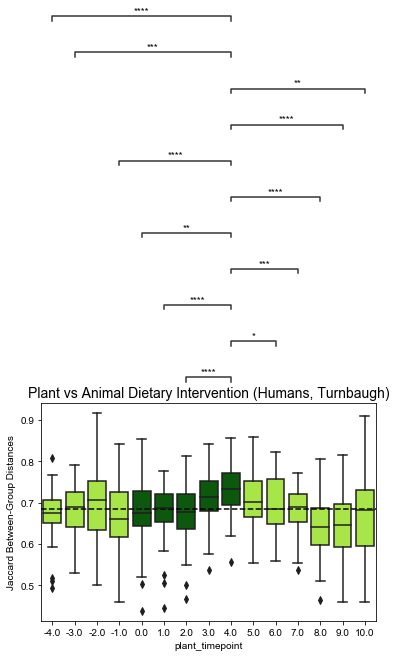

In [69]:
order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
box_pairs = [ ('-4.0', '4.0'),  ('-3.0', '4.0'), ('-1.0', '4.0'),
             ('0.0', '4.0'), ('4.0', '1.0'), ('4.0', '2.0'),
             ('4.0', '6.0'), ('4.0', '7.0'), ('4.0', '8.0'), ('4.0', '9.0'),
             ('4.0', '10.0')]
ax = sns.boxplot(x="plant_timepoint", y="jc_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=jcdm4, order=order)
add_stat_annotation(ax, data=jcdm4, x="plant_timepoint", y="jc_distance", order=order,
                    box_pairs=box_pairs, line_offset=0.1,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2);
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Jaccard Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.6855395573286484, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/human_jc_dist_boxplot.svg', dpi=300, bbox_inches="tight")
#Intervention Day 0-4

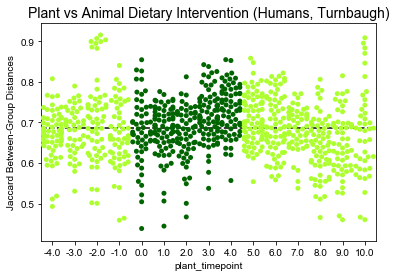

In [45]:
ax = sns.swarmplot(x="plant_timepoint", y="jc_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=jcdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.ylabel('Jaccard Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.6855395573286484, color='k', ls='--')
#Intervention Day 0-4

In [61]:
timez = ['-4.0', '10.0']
jcdm_410 = jcdm4.loc[bcdm4['plant_timepoint'].isin(timez)]
jcdm_410.jc_distance.values.mean()

0.6732051931386016

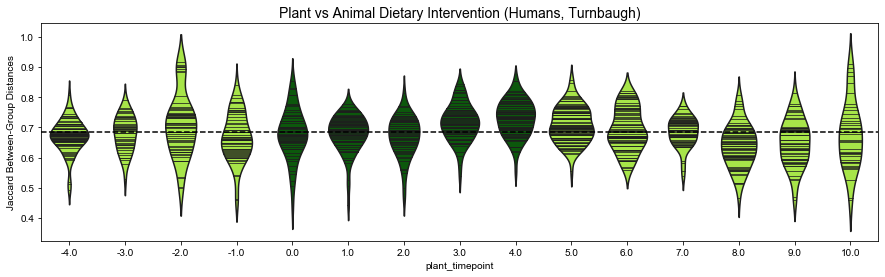

In [46]:
plt.figure(figsize=(15,4))
ax = sns.violinplot(x="plant_timepoint", y="jc_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=jcdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], split=True,
                    scale="count", inner="stick")
plt.ylabel('Jaccard Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.6855395573286484, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_jc_dist_violinplot.svg', dpi=300, bbox_inches="tight")

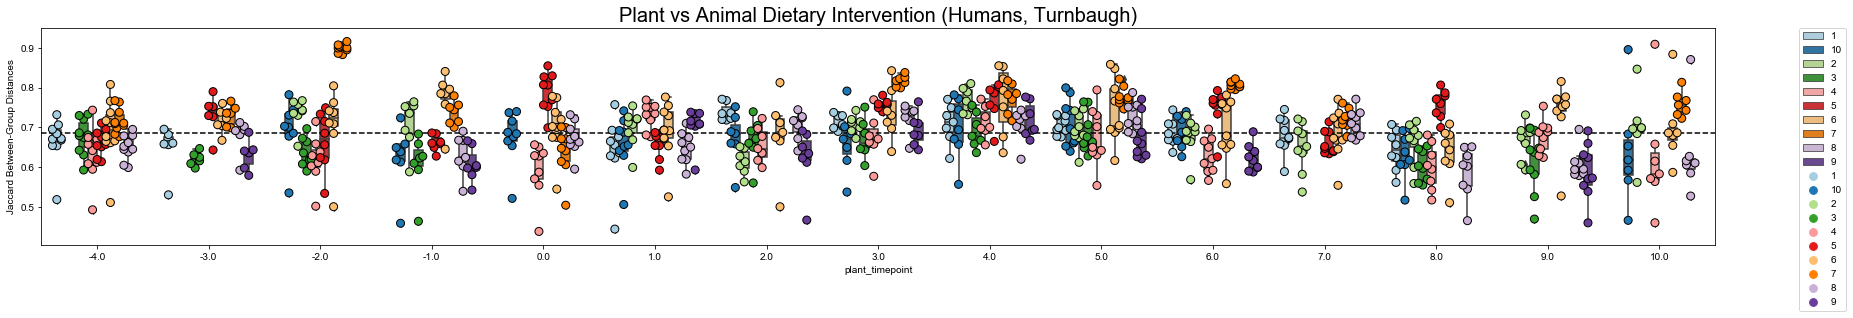

In [47]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="plant_timepoint", y="jc_distance", hue='plant_patient',
                  palette='Paired',
                  data=jcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="plant_timepoint", y="jc_distance", hue='plant_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=jcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Jaccard Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.6855395573286484, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_jc_dist_boxplot_byP_long_plant.svg', dpi=300, bbox_inches="tight")

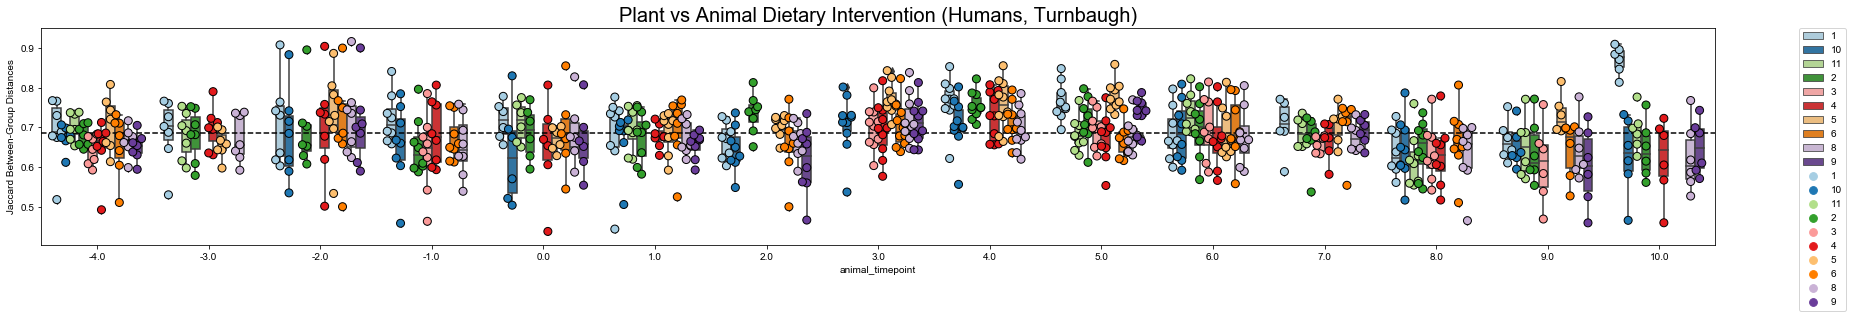

In [48]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="animal_timepoint", y="jc_distance", hue='animal_patient',
                  palette='Paired',
                  data=jcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="animal_timepoint", y="jc_distance", hue='animal_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=jcdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Jaccard Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.6855395573286484, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_jc_dist_boxplot_byP_long_animal.svg', dpi=300, bbox_inches="tight")

In [49]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
jcdm4['Rank'] = jcdm4['plant_timepoint'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
jcdm5 = jcdm4.sort_values(by=['Rank'], axis=0, ascending=True)
jcdm5.plant_timepoint.unique()

array(['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0',
       '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], dtype=object)

<Figure size 1440x288 with 0 Axes>

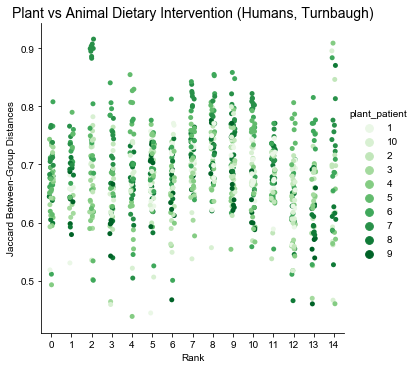

In [50]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="jc_distance", hue='plant_patient', palette='Greens', data=jcdm5)
plt.ylabel('Jaccard Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

<Figure size 1440x288 with 0 Axes>

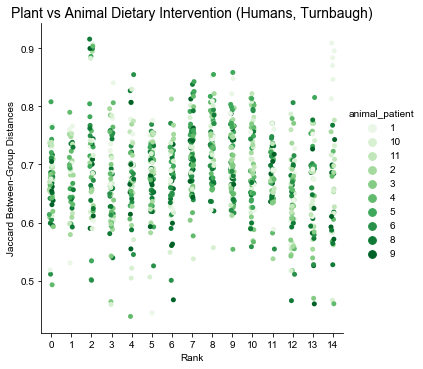

In [51]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="jc_distance", hue='animal_patient', palette='Greens', data=jcdm5)
plt.ylabel('Jaccard Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

In [52]:
from scipy.stats import wilcoxon
from itertools import combinations

In [53]:
for key in list(combinations(jcdm5.plant_timepoint.unique(), 2)):
    x = jcdm5[jcdm5["plant_timepoint"] == key[0]].jc_distance.values
    y = jcdm5[jcdm5["plant_timepoint"] == key[1]].jc_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        print("Combination", key)
        print("Not Even, can't use Wilcoxon")
        print("____________________")
#significant combinations 

Combination ('-4.0', '-3.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '-2.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '-1.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '0.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '1.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '2.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '3.0')
0.0002884842326555045 623.0
____________________
Combination ('-4.0', '4.0')
1.0620570654364856e-08 265.0
____________________
Combination ('-4.0', '5.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '6.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '7.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '8.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '9.0')
Not Even, can't use Wilcoxon
_____

In [54]:
from scipy.stats import mannwhitneyu

In [55]:
for key in list(combinations(jcdm5.plant_timepoint.unique(), 2)):
    x = jcdm5[jcdm5["plant_timepoint"] == key[0]].jc_distance.values
    y = jcdm5[jcdm5["plant_timepoint"] == key[1]].jc_distance.values
    w, p = mannwhitneyu(x, y)
    print("Combination", key)
    print(p, w)
    print("____________________")

Combination ('-4.0', '-3.0')
0.23446827414277788 1349.0
____________________
Combination ('-4.0', '-2.0')
0.017914967687107212 1532.0
____________________
Combination ('-4.0', '-1.0')
0.2870073528091424 1845.0
____________________
Combination ('-4.0', '0.0')
0.27856665706984074 1773.0
____________________
Combination ('-4.0', '1.0')
0.09969360418559786 2205.0
____________________
Combination ('-4.0', '2.0')
0.45407368064763537 1936.0
____________________
Combination ('-4.0', '3.0')
7.666300970720203e-06 1412.0
____________________
Combination ('-4.0', '4.0')
9.209682731360641e-09 1099.5
____________________
Combination ('-4.0', '5.0')
0.00017158448912346446 1875.0
____________________
Combination ('-4.0', '6.0')
0.07175573512842254 2161.0
____________________
Combination ('-4.0', '7.0')
0.0802326926486373 1611.0
____________________
Combination ('-4.0', '8.0')
0.0013498650569764212 1566.0
____________________
Combination ('-4.0', '9.0')
0.03909259831849835 1540.0
____________________
C

# Weighted UniFrac

In [3]:
human_w_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_weighted_unifrac.tsv', sep='\t', index_col=0)
human_w_dm.head()

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
DD1,0.000000,0.577603,0.699593,0.712375,0.641843,0.632997,0.649537,0.565427,0.458084,0.743524,...,0.446972,0.558853,0.654528,0.548049,0.600350,0.436572,0.643378,0.619327,0.584043,0.600446
DD10,0.577603,0.000000,0.258862,0.236352,0.168613,0.159969,0.188294,0.067099,0.217834,0.293735,...,0.203451,0.135424,0.230470,0.135093,0.185712,0.242924,0.203162,0.256473,0.155151,0.102734
DD100,0.699593,0.258862,0.000000,0.285337,0.259561,0.257553,0.269137,0.256871,0.361495,0.111515,...,0.340676,0.252603,0.108261,0.291552,0.295033,0.365655,0.213535,0.254221,0.284809,0.233443
DD101,0.712375,0.236352,0.285337,0.000000,0.138178,0.245431,0.159166,0.242060,0.372394,0.252970,...,0.375480,0.292550,0.307089,0.278990,0.234917,0.385728,0.252449,0.377990,0.311581,0.244519
DD102,0.641843,0.168613,0.259561,0.138178,0.000000,0.185601,0.090318,0.168820,0.298861,0.285355,...,0.304538,0.221538,0.241101,0.224784,0.161423,0.319907,0.209778,0.320841,0.254129,0.194197


In [4]:
named_wUF_dm = pd.merge(human_metadata, human_w_dm, left_index=True, right_index=True)
named_wUF_dm.head()

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
ID63,1,Animal,-4.0,0.533694,0.158648,0.287435,0.305836,0.242008,0.219095,0.263620,...,0.193496,0.169719,0.245182,0.168842,0.217016,0.112583,0.236762,0.248223,0.187026,0.182464
ID92,1,Animal,-3.0,0.436572,0.242924,0.365655,0.385728,0.319907,0.302146,0.330924,...,0.145648,0.242193,0.322105,0.210962,0.283910,0.000000,0.318278,0.294054,0.269760,0.273096
ID265,1,Animal,-2.0,0.519697,0.168017,0.285319,0.321003,0.261424,0.229960,0.277889,...,0.182850,0.174132,0.242294,0.180367,0.235492,0.129795,0.241130,0.252031,0.176825,0.185535
ID58,1,Animal,-1.0,0.514763,0.179135,0.312284,0.330027,0.269079,0.241344,0.282525,...,0.191898,0.191476,0.258138,0.179697,0.251528,0.101519,0.262807,0.259905,0.193852,0.200603
ID46,1,Animal,0.0,0.531945,0.155133,0.304195,0.285576,0.222042,0.211839,0.233129,...,0.201054,0.186333,0.259088,0.153297,0.201117,0.130491,0.258045,0.238715,0.212369,0.208433


In [5]:
named_wUF_dm['group_time'] = named_wUF_dm['Subject/Food'].astype(str) + "_" + named_wUF_dm['Diet'].astype(str) + '_' + named_wUF_dm['Day'].astype(str)

In [6]:
gt_wUF_dm = named_wUF_dm[['group_time']].copy()
gt_wUF_dm.head()

,group_time
ID63,1_Animal_-4.0
ID92,1_Animal_-3.0
ID265,1_Animal_-2.0
ID58,1_Animal_-1.0
ID46,1_Animal_0.0


In [7]:
named_wUF_dm = named_wUF_dm.set_index('group_time')
named_wUF_dm

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,1,Animal,-4.0,0.533694,0.158648,0.287435,0.305836,0.242008,0.219095,0.263620,...,0.193496,0.169719,0.245182,0.168842,0.217016,0.112583,0.236762,0.248223,0.187026,0.182464
1_Animal_-3.0,1,Animal,-3.0,0.436572,0.242924,0.365655,0.385728,0.319907,0.302146,0.330924,...,0.145648,0.242193,0.322105,0.210962,0.283910,0.000000,0.318278,0.294054,0.269760,0.273096
1_Animal_-2.0,1,Animal,-2.0,0.519697,0.168017,0.285319,0.321003,0.261424,0.229960,0.277889,...,0.182850,0.174132,0.242294,0.180367,0.235492,0.129795,0.241130,0.252031,0.176825,0.185535
1_Animal_-1.0,1,Animal,-1.0,0.514763,0.179135,0.312284,0.330027,0.269079,0.241344,0.282525,...,0.191898,0.191476,0.258138,0.179697,0.251528,0.101519,0.262807,0.259905,0.193852,0.200603
1_Animal_0.0,1,Animal,0.0,0.531945,0.155133,0.304195,0.285576,0.222042,0.211839,0.233129,...,0.201054,0.186333,0.259088,0.153297,0.201117,0.130491,0.258045,0.238715,0.212369,0.208433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,11,Animal,6.0,0.455313,0.243164,0.389329,0.376590,0.308188,0.296496,0.300258,...,0.193755,0.258858,0.340308,0.211749,0.228150,0.171088,0.339661,0.283949,0.259835,0.282795
11_Animal_7.0,11,Animal,7.0,0.498373,0.172837,0.328222,0.298837,0.232908,0.228731,0.232857,...,0.206697,0.190176,0.290435,0.137256,0.130343,0.200463,0.265952,0.253815,0.231993,0.234615
11_Animal_8.0,11,Animal,8.0,0.557601,0.160542,0.286720,0.262439,0.188788,0.201104,0.190320,...,0.237986,0.190312,0.247623,0.151751,0.109761,0.235719,0.248323,0.225462,0.227566,0.219876


In [8]:
named_wUF_dm2 = named_wUF_dm.drop(columns=['Subject/Food', 'Diet', 'Day'])
named_wUF_dm2

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,0.533694,0.158648,0.287435,0.305836,0.242008,0.219095,0.263620,0.161114,0.137724,0.334252,...,0.193496,0.169719,0.245182,0.168842,0.217016,0.112583,0.236762,0.248223,0.187026,0.182464
1_Animal_-3.0,0.436572,0.242924,0.365655,0.385728,0.319907,0.302146,0.330924,0.236547,0.086670,0.415829,...,0.145648,0.242193,0.322105,0.210962,0.283910,0.000000,0.318278,0.294054,0.269760,0.273096
1_Animal_-2.0,0.519697,0.168017,0.285319,0.321003,0.261424,0.229960,0.277889,0.173039,0.159206,0.331780,...,0.182850,0.174132,0.242294,0.180367,0.235492,0.129795,0.241130,0.252031,0.176825,0.185535
1_Animal_-1.0,0.514763,0.179135,0.312284,0.330027,0.269079,0.241344,0.282525,0.190933,0.141645,0.358952,...,0.191898,0.191476,0.258138,0.179697,0.251528,0.101519,0.262807,0.259905,0.193852,0.200603
1_Animal_0.0,0.531945,0.155133,0.304195,0.285576,0.222042,0.211839,0.233129,0.150415,0.140923,0.346657,...,0.201054,0.186333,0.259088,0.153297,0.201117,0.130491,0.258045,0.238715,0.212369,0.208433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,0.455313,0.243164,0.389329,0.376590,0.308188,0.296496,0.300258,0.245344,0.164369,0.432101,...,0.193755,0.258858,0.340308,0.211749,0.228150,0.171088,0.339661,0.283949,0.259835,0.282795
11_Animal_7.0,0.498373,0.172837,0.328222,0.298837,0.232908,0.228731,0.232857,0.161449,0.178439,0.363913,...,0.206697,0.190176,0.290435,0.137256,0.130343,0.200463,0.265952,0.253815,0.231993,0.234615
11_Animal_8.0,0.557601,0.160542,0.286720,0.262439,0.188788,0.201104,0.190320,0.146875,0.218946,0.316764,...,0.237986,0.190312,0.247623,0.151751,0.109761,0.235719,0.248323,0.225462,0.227566,0.219876


In [9]:
rn_wUF_dm = pd.merge(named_wUF_dm2.T, gt_wUF_dm, left_index=True, right_index=True)
rn_wUF_dm2 = rn_wUF_dm.set_index('group_time')
rn_wUF_dm2

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.158648,0.242924,0.168017,0.179135,0.155133,0.184441,0.186822,0.290487,0.187150,0.300114,...,0.176118,0.184194,0.207101,0.185712,0.259489,0.243164,0.172837,0.160542,0.195760,0.237124
8_Plant_5.0,0.242008,0.319907,0.261424,0.269079,0.222042,0.250344,0.214644,0.370671,0.206384,0.379231,...,0.186258,0.169150,0.274111,0.161423,0.342121,0.308188,0.232908,0.188788,0.169641,0.290740
2_Plant_5.0,0.263620,0.330924,0.277889,0.282525,0.233129,0.266573,0.227465,0.385730,0.210084,0.393468,...,0.172782,0.153179,0.277501,0.144755,0.337666,0.300258,0.232857,0.190320,0.151180,0.290918
9_Plant_4.0,0.161114,0.236547,0.173039,0.190933,0.150415,0.176827,0.211274,0.313479,0.208273,0.310064,...,0.151873,0.172692,0.201357,0.171251,0.268023,0.245344,0.161449,0.146875,0.179679,0.230511
1_Plant_5.0,0.137724,0.086670,0.159206,0.141645,0.140923,0.117849,0.251005,0.217348,0.249351,0.176635,...,0.245858,0.277209,0.166584,0.261702,0.186694,0.164369,0.178439,0.218946,0.274386,0.165079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_Animal_-3.0,0.112583,0.000000,0.129795,0.101519,0.130491,0.098046,0.240965,0.207548,0.257504,0.170386,...,0.265964,0.292052,0.177614,0.283910,0.183552,0.171088,0.200463,0.235719,0.302397,0.199473
10_Animal_-4.0,0.236762,0.318278,0.241130,0.262807,0.258045,0.260627,0.235373,0.366877,0.226265,0.384812,...,0.206226,0.199200,0.296848,0.220348,0.342391,0.339661,0.265952,0.248323,0.228555,0.361848
6_Animal_7.0,0.248223,0.294054,0.252031,0.259905,0.238715,0.249625,0.289377,0.369568,0.322103,0.332563,...,0.285723,0.289844,0.265139,0.302583,0.284373,0.283949,0.253815,0.225462,0.299012,0.296777


In [10]:
al_wUF_dm = rn_wUF_dm2.filter(regex='Plant', axis=0)
alt_wUF_dm = al_wUF_dm.filter(regex='Animal', axis=1)
alt_wUF_dm.shape

(115, 121)

In [11]:
alt_wUF_dm.head()

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.158648,0.242924,0.168017,0.179135,0.155133,0.184441,0.186822,0.290487,0.187150,0.300114,...,0.176118,0.184194,0.207101,0.185712,0.259489,0.243164,0.172837,0.160542,0.195760,0.237124
8_Plant_5.0,0.242008,0.319907,0.261424,0.269079,0.222042,0.250344,0.214644,0.370671,0.206384,0.379231,...,0.186258,0.169150,0.274111,0.161423,0.342121,0.308188,0.232908,0.188788,0.169641,0.290740
2_Plant_5.0,0.263620,0.330924,0.277889,0.282525,0.233129,0.266573,0.227465,0.385730,0.210084,0.393468,...,0.172782,0.153179,0.277501,0.144755,0.337666,0.300258,0.232857,0.190320,0.151180,0.290918
9_Plant_4.0,0.161114,0.236547,0.173039,0.190933,0.150415,0.176827,0.211274,0.313479,0.208273,0.310064,...,0.151873,0.172692,0.201357,0.171251,0.268023,0.245344,0.161449,0.146875,0.179679,0.230511
1_Plant_5.0,0.137724,0.086670,0.159206,0.141645,0.140923,0.117849,0.251005,0.217348,0.249351,0.176635,...,0.245858,0.277209,0.166584,0.261702,0.186694,0.164369,0.178439,0.218946,0.274386,0.165079


In [12]:
wUFdm = alt_wUF_dm.copy()
wUFdm2 = wUFdm.stack().reset_index()
wUFdm2.columns = ['Plant','Animal','wUF_distance']
wUFdm2

,Plant,Animal,wUF_distance
0,9_Plant_-3.0,1_Animal_-4.0,0.158648
1,9_Plant_-3.0,1_Animal_-3.0,0.242924
2,9_Plant_-3.0,1_Animal_-2.0,0.168017
3,9_Plant_-3.0,1_Animal_-1.0,0.179135
4,9_Plant_-3.0,1_Animal_0.0,0.155133
...,...,...,...
13910,7_Plant_7.0,11_Animal_6.0,0.260897
13911,7_Plant_7.0,11_Animal_7.0,0.297856
13912,7_Plant_7.0,11_Animal_8.0,0.349622
13913,7_Plant_7.0,11_Animal_9.0,0.407547


In [13]:
wUFdm2['plant_timepoint'] = wUFdm2['Plant'].str.split('_').str[2]
wUFdm2['animal_timepoint'] = wUFdm2['Animal'].str.split('_').str[2]
wUFdm3 = wUFdm2.loc[wUFdm2['plant_timepoint'] == wUFdm2['animal_timepoint']]
wUFdm3.head()

,Plant,Animal,wUF_distance,plant_timepoint,animal_timepoint
1,9_Plant_-3.0,1_Animal_-3.0,0.242924,-3.0,-3.0
15,9_Plant_-3.0,2_Animal_-3.0,0.201214,-3.0,-3.0
37,9_Plant_-3.0,4_Animal_-3.0,0.160429,-3.0,-3.0
50,9_Plant_-3.0,5_Animal_-3.0,0.272252,-3.0,-3.0
75,9_Plant_-3.0,8_Animal_-3.0,0.159932,-3.0,-3.0


In [14]:
wUFdm4 = wUFdm3.copy()
wUFdm4['plant_patient'] = wUFdm4['Plant'].str.split('_').str[0]
wUFdm4['animal_patient'] = wUFdm4['Animal'].str.split('_').str[0]

In [15]:
wUFdm4.wUF_distance.values.mean()

0.26951551787409594

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.577e-04 U_stat=1.134e+03
4.0 v.s. 6.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.323e+03
1.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.801e-02 U_stat=1.808e+03
4.0 v.s. 7.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.335e-02 U_stat=2.510e+03
0.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.282e-03 U_stat=1.197e+03
4.0 v.s. 8.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.537e-04 U_stat=3.224e+03
-1.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.808e+03
4.0 v.s. 9.0: Mann-Whitney-Wilcoxon test two-sided 

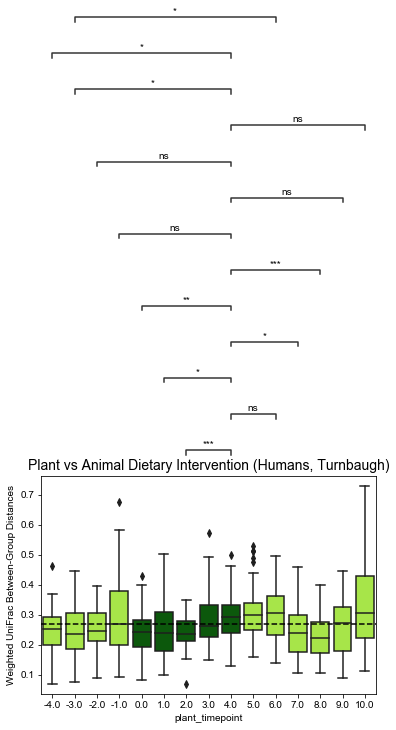

In [37]:
order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
box_pairs = [ ('-4.0', '4.0'),  ('-3.0', '4.0'), ('-1.0', '4.0'), ('-2.0', '4.0'), ('-3.0', '6.0'), 
             ('0.0', '4.0'), ('4.0', '1.0'), ('4.0', '2.0'),
             ('4.0', '6.0'), ('4.0', '7.0'), ('4.0', '8.0'), ('4.0', '9.0'),
             ('4.0', '10.0'), ]
ax = sns.boxplot(x="plant_timepoint", y="wUF_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=wUFdm4, order=order)
add_stat_annotation(ax, data=wUFdm4, x="plant_timepoint", y="wUF_distance", order=order,
                    box_pairs=box_pairs, line_offset=0.1,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2);
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.26951551787409594, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/human_wUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")
#Intervention Day 0-4

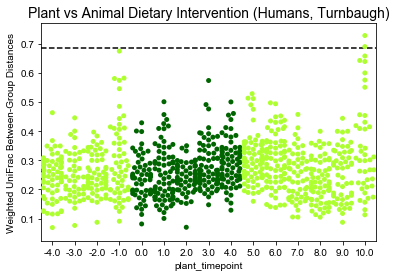

In [20]:
ax = sns.swarmplot(x="plant_timepoint", y="wUF_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=wUFdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.6855395573286484, color='k', ls='--')
#Intervention Day 0-4

In [21]:
timez = ['-4.0', '10.0']
wUFdm_410 = wUFdm4.loc[wUFdm4['plant_timepoint'].isin(timez)]
wUFdm_410.wUF_distance.values.mean()

0.2838116666676825

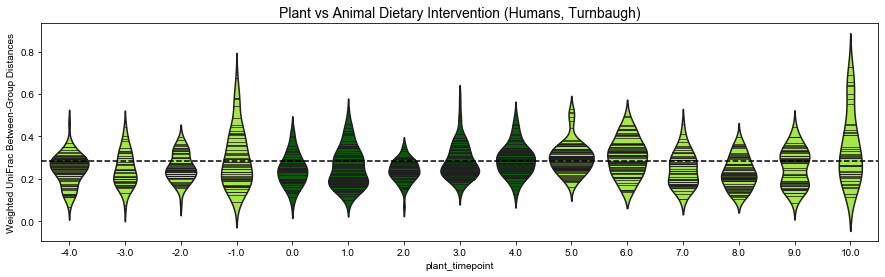

In [23]:
plt.figure(figsize=(15,4))
ax = sns.violinplot(x="plant_timepoint", y="wUF_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=wUFdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], split=True,
                    scale="count", inner="stick")
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.2838116666676825, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_wUF_dist_violinplot.svg', dpi=300, bbox_inches="tight")

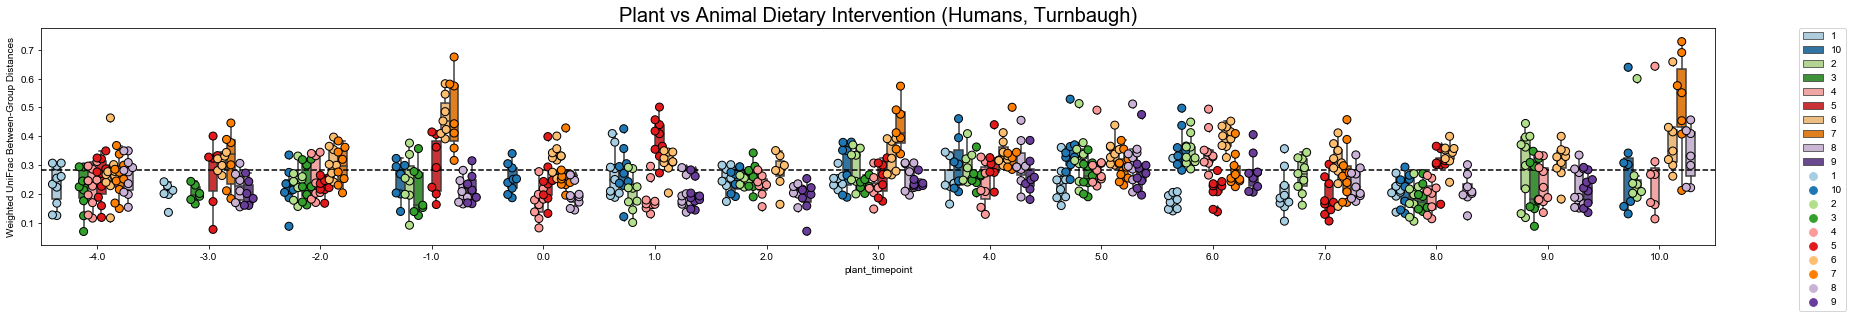

In [24]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="plant_timepoint", y="wUF_distance", hue='plant_patient',
                  palette='Paired',
                  data=wUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="plant_timepoint", y="wUF_distance", hue='plant_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=wUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.2838116666676825, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_wUF_dist_boxplot_byP_long_plant.svg', dpi=300, bbox_inches="tight")

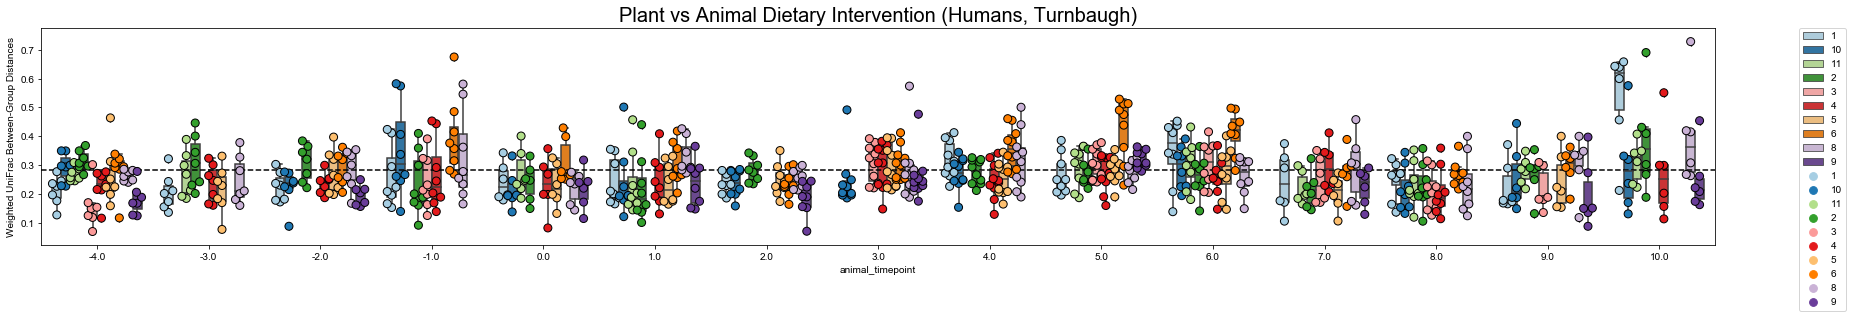

In [26]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="animal_timepoint", y="wUF_distance", hue='animal_patient',
                  palette='Paired',
                  data=wUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="animal_timepoint", y="wUF_distance", hue='animal_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=wUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.2838116666676825, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_wUF_dist_boxplot_byP_long_animal.svg', dpi=300, bbox_inches="tight")

In [27]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
wUFdm4['Rank'] = wUFdm4['plant_timepoint'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
wUFdm5 = wUFdm4.sort_values(by=['Rank'], axis=0, ascending=True)
wUFdm5.plant_timepoint.unique()

array(['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0',
       '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], dtype=object)

<Figure size 1440x288 with 0 Axes>

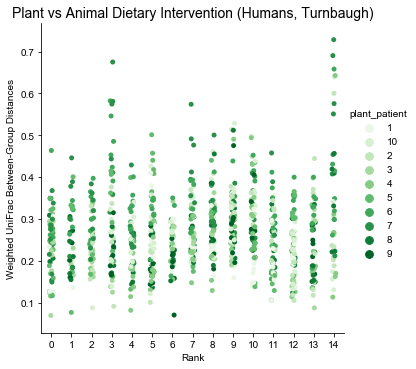

In [28]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="wUF_distance", hue='plant_patient', palette='Greens', data=wUFdm5)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

<Figure size 1440x288 with 0 Axes>

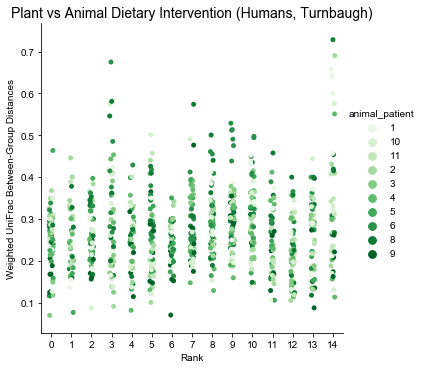

In [29]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="wUF_distance", hue='animal_patient', palette='Greens', data=wUFdm5)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

In [30]:
from scipy.stats import wilcoxon
from itertools import combinations

In [31]:
for key in list(combinations(wUFdm5.plant_timepoint.unique(), 2)):
    x = wUFdm5[wUFdm5["plant_timepoint"] == key[0]].wUF_distance.values
    y = wUFdm5[wUFdm5["plant_timepoint"] == key[1]].wUF_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        print("Combination", key)
        print("Not Even, can't use Wilcoxon")
        print("____________________")
#significant combinations 

Combination ('-4.0', '-3.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '-2.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '-1.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '0.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '1.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '2.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '3.0')
0.01820825717443306 839.0
____________________
Combination ('-4.0', '4.0')
0.006221080191493609 775.0
____________________
Combination ('-4.0', '5.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '6.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '7.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '8.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '9.0')
Not Even, can't use Wilcoxon
_________

In [32]:
from scipy.stats import mannwhitneyu

In [33]:
for key in list(combinations(wUFdm5.plant_timepoint.unique(), 2)):
    x = wUFdm5[wUFdm5["plant_timepoint"] == key[0]].wUF_distance.values
    y = wUFdm5[wUFdm5["plant_timepoint"] == key[1]].wUF_distance.values
    w, p = mannwhitneyu(x, y)
    print("Combination", key)
    print(p, w)
    print("____________________")

Combination ('-4.0', '-3.0')
0.422568688812916 1437.0
____________________
Combination ('-4.0', '-2.0')
0.3499693332034181 1881.0
____________________
Combination ('-4.0', '-1.0')
0.04826659974071784 1621.0
____________________
Combination ('-4.0', '0.0')
0.26684552145124135 1766.0
____________________
Combination ('-4.0', '1.0')
0.4456360014138709 2486.0
____________________
Combination ('-4.0', '2.0')
0.19989519113391768 1788.0
____________________
Combination ('-4.0', '3.0')
0.020673863348561358 1960.0
____________________
Combination ('-4.0', '4.0')
0.0006707608122576723 1680.0
____________________
Combination ('-4.0', '5.0')
9.267893294961728e-06 1687.0
____________________
Combination ('-4.0', '6.0')
0.00011001207949290673 1614.0
____________________
Combination ('-4.0', '7.0')
0.42900686136910426 1854.0
____________________
Combination ('-4.0', '8.0')
0.0786431692463352 1922.0
____________________
Combination ('-4.0', '9.0')
0.27183822096415383 1769.0
____________________
Combin

# Unweighted UniFrac

In [4]:
human_uw_dm = pd.read_csv('../data/David_Turnbaugh_2012Data/distance_matrix_unweighted_unifrac.tsv', sep='\t', index_col=0)
human_uw_dm.head()

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
DD1,0.000000,0.623623,0.723820,0.604695,0.586423,0.645695,0.632213,0.551983,0.553588,0.749660,...,0.593298,0.584398,0.712562,0.632195,0.597469,0.592994,0.639445,0.678922,0.670382,0.578118
DD10,0.623623,0.000000,0.587347,0.528801,0.442654,0.443121,0.455333,0.290426,0.539945,0.597651,...,0.418520,0.504473,0.592173,0.424931,0.552024,0.546005,0.536564,0.595576,0.547486,0.254604
DD100,0.723820,0.587347,0.000000,0.639925,0.649899,0.642085,0.664082,0.565704,0.637121,0.217299,...,0.586144,0.609713,0.278460,0.666430,0.696527,0.636488,0.620120,0.477287,0.686386,0.610815
DD101,0.604695,0.528801,0.639925,0.000000,0.245181,0.613620,0.336299,0.521119,0.600544,0.647381,...,0.504588,0.635419,0.618922,0.471790,0.574488,0.588661,0.681603,0.530730,0.654124,0.574477
DD102,0.586423,0.442654,0.649899,0.245181,0.000000,0.586859,0.322353,0.456822,0.590521,0.655984,...,0.488709,0.605709,0.622778,0.489006,0.511163,0.599484,0.630319,0.572301,0.617612,0.531175


In [5]:
named_uwUF_dm = pd.merge(human_metadata, human_uw_dm, left_index=True, right_index=True)
named_uwUF_dm.head()

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
ID63,1,Animal,-4.0,0.620564,0.526398,0.629765,0.563864,0.557063,0.532379,0.595525,...,0.449810,0.597728,0.613436,0.574914,0.563506,0.188177,0.592437,0.603945,0.541507,0.507192
ID92,1,Animal,-3.0,0.592994,0.546005,0.636488,0.588661,0.599484,0.565283,0.612038,...,0.470942,0.574451,0.636953,0.521736,0.575619,0.000000,0.595157,0.621781,0.588997,0.540052
ID265,1,Animal,-2.0,0.591898,0.492531,0.615967,0.545822,0.560133,0.505439,0.573850,...,0.464223,0.560127,0.590875,0.533259,0.569976,0.248587,0.561586,0.573658,0.516899,0.475781
ID58,1,Animal,-1.0,0.656227,0.526108,0.643603,0.587236,0.607699,0.526574,0.612095,...,0.492098,0.605494,0.618207,0.557773,0.623247,0.216882,0.604288,0.610935,0.542899,0.505319
ID46,1,Animal,0.0,0.632949,0.546634,0.648261,0.534369,0.550917,0.555397,0.577962,...,0.463774,0.610828,0.618987,0.545986,0.575216,0.202342,0.597646,0.614638,0.590342,0.545799


In [6]:
named_uwUF_dm['group_time'] = named_uwUF_dm['Subject/Food'].astype(str) + "_" + named_uwUF_dm['Diet'].astype(str) + '_' + named_uwUF_dm['Day'].astype(str)

In [7]:
gt_uwUF_dm = named_uwUF_dm[['group_time']].copy()
gt_uwUF_dm.head()

,group_time
ID63,1_Animal_-4.0
ID92,1_Animal_-3.0
ID265,1_Animal_-2.0
ID58,1_Animal_-1.0
ID46,1_Animal_0.0


In [8]:
named_uwUF_dm = named_uwUF_dm.set_index('group_time')
named_uwUF_dm

,Subject/Food,Diet,Day,DD1,DD10,DD100,DD101,DD102,DD103,DD104,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,1,Animal,-4.0,0.620564,0.526398,0.629765,0.563864,0.557063,0.532379,0.595525,...,0.449810,0.597728,0.613436,0.574914,0.563506,0.188177,0.592437,0.603945,0.541507,0.507192
1_Animal_-3.0,1,Animal,-3.0,0.592994,0.546005,0.636488,0.588661,0.599484,0.565283,0.612038,...,0.470942,0.574451,0.636953,0.521736,0.575619,0.000000,0.595157,0.621781,0.588997,0.540052
1_Animal_-2.0,1,Animal,-2.0,0.591898,0.492531,0.615967,0.545822,0.560133,0.505439,0.573850,...,0.464223,0.560127,0.590875,0.533259,0.569976,0.248587,0.561586,0.573658,0.516899,0.475781
1_Animal_-1.0,1,Animal,-1.0,0.656227,0.526108,0.643603,0.587236,0.607699,0.526574,0.612095,...,0.492098,0.605494,0.618207,0.557773,0.623247,0.216882,0.604288,0.610935,0.542899,0.505319
1_Animal_0.0,1,Animal,0.0,0.632949,0.546634,0.648261,0.534369,0.550917,0.555397,0.577962,...,0.463774,0.610828,0.618987,0.545986,0.575216,0.202342,0.597646,0.614638,0.590342,0.545799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,11,Animal,6.0,0.565877,0.593678,0.725081,0.616097,0.569848,0.598188,0.573643,...,0.623052,0.668897,0.680126,0.608783,0.423305,0.639524,0.667309,0.643191,0.583851,0.588711
11_Animal_7.0,11,Animal,7.0,0.547544,0.548343,0.705714,0.566269,0.497765,0.637044,0.548909,...,0.557639,0.607547,0.676105,0.547588,0.282490,0.588108,0.646691,0.641334,0.639489,0.607954
11_Animal_8.0,11,Animal,8.0,0.585468,0.498675,0.607405,0.487274,0.417099,0.599732,0.465853,...,0.542294,0.596823,0.572226,0.516083,0.288727,0.560099,0.620173,0.497130,0.599006,0.558714


In [9]:
named_uwUF_dm2 = named_uwUF_dm.drop(columns=['Subject/Food', 'Diet', 'Day'])
named_uwUF_dm2

,DD1,DD10,DD100,DD101,DD102,DD103,DD104,DD106,DD107,DD108,...,ID87,ID89,ID9,ID90,ID91,ID92,ID95,ID97,ID98,ID99
group_time,,,,,,,,,,,,,,,,,,,,,
1_Animal_-4.0,0.620564,0.526398,0.629765,0.563864,0.557063,0.532379,0.595525,0.526520,0.287388,0.628994,...,0.449810,0.597728,0.613436,0.574914,0.563506,0.188177,0.592437,0.603945,0.541507,0.507192
1_Animal_-3.0,0.592994,0.546005,0.636488,0.588661,0.599484,0.565283,0.612038,0.506982,0.213710,0.654887,...,0.470942,0.574451,0.636953,0.521736,0.575619,0.000000,0.595157,0.621781,0.588997,0.540052
1_Animal_-2.0,0.591898,0.492531,0.615967,0.545822,0.560133,0.505439,0.573850,0.492533,0.328229,0.601119,...,0.464223,0.560127,0.590875,0.533259,0.569976,0.248587,0.561586,0.573658,0.516899,0.475781
1_Animal_-1.0,0.656227,0.526108,0.643603,0.587236,0.607699,0.526574,0.612095,0.544194,0.337965,0.633598,...,0.492098,0.605494,0.618207,0.557773,0.623247,0.216882,0.604288,0.610935,0.542899,0.505319
1_Animal_0.0,0.632949,0.546634,0.648261,0.534369,0.550917,0.555397,0.577962,0.530750,0.281075,0.629199,...,0.463774,0.610828,0.618987,0.545986,0.575216,0.202342,0.597646,0.614638,0.590342,0.545799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_Animal_6.0,0.565877,0.593678,0.725081,0.616097,0.569848,0.598188,0.573643,0.599123,0.643348,0.723530,...,0.623052,0.668897,0.680126,0.608783,0.423305,0.639524,0.667309,0.643191,0.583851,0.588711
11_Animal_7.0,0.547544,0.548343,0.705714,0.566269,0.497765,0.637044,0.548909,0.587737,0.581796,0.723784,...,0.557639,0.607547,0.676105,0.547588,0.282490,0.588108,0.646691,0.641334,0.639489,0.607954
11_Animal_8.0,0.585468,0.498675,0.607405,0.487274,0.417099,0.599732,0.465853,0.508441,0.564286,0.627579,...,0.542294,0.596823,0.572226,0.516083,0.288727,0.560099,0.620173,0.497130,0.599006,0.558714


In [10]:
rn_uwUF_dm = pd.merge(named_uwUF_dm2.T, gt_uwUF_dm, left_index=True, right_index=True)
rn_uwUF_dm2 = rn_uwUF_dm.set_index('group_time')
rn_uwUF_dm2

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.526398,0.546005,0.492531,0.526108,0.546634,0.567288,0.564050,0.633498,0.613661,0.533666,...,0.526798,0.529192,0.580074,0.552024,0.601771,0.593678,0.548343,0.498675,0.550544,0.558412
8_Plant_5.0,0.557063,0.599484,0.560133,0.607699,0.550917,0.548292,0.613660,0.606279,0.592218,0.560115,...,0.504588,0.472415,0.516479,0.511163,0.562264,0.569848,0.497765,0.417099,0.496618,0.552624
2_Plant_5.0,0.595525,0.612038,0.573850,0.612095,0.577962,0.596525,0.617161,0.651116,0.581770,0.594441,...,0.515210,0.518058,0.583042,0.541592,0.583239,0.573643,0.548909,0.465853,0.520738,0.557716
9_Plant_4.0,0.526520,0.506982,0.492533,0.544194,0.530750,0.512660,0.549967,0.687163,0.629434,0.545146,...,0.484813,0.523766,0.595305,0.559239,0.584206,0.599123,0.587737,0.508441,0.561264,0.560656
1_Plant_5.0,0.287388,0.213710,0.328229,0.337965,0.281075,0.277735,0.470769,0.505039,0.529680,0.390912,...,0.512057,0.555351,0.571671,0.581101,0.625751,0.643348,0.581796,0.564286,0.536448,0.543146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_Animal_-3.0,0.188177,0.000000,0.248587,0.216882,0.202342,0.176717,0.434420,0.545356,0.555422,0.428466,...,0.524769,0.551053,0.566222,0.575619,0.615565,0.639524,0.588108,0.560099,0.571830,0.593715
10_Animal_-4.0,0.592437,0.595157,0.561586,0.604288,0.597646,0.599528,0.599759,0.654850,0.602637,0.599906,...,0.612766,0.634802,0.633297,0.619576,0.625096,0.667309,0.646691,0.620173,0.635862,0.700228
6_Animal_7.0,0.603945,0.621781,0.573658,0.610935,0.614638,0.614199,0.626678,0.695241,0.694043,0.578753,...,0.557632,0.536107,0.624099,0.629291,0.581295,0.643191,0.641334,0.497130,0.556597,0.628858


In [11]:
al_uwUF_dm = rn_uwUF_dm2.filter(regex='Plant', axis=0)
alt_uwUF_dm = al_uwUF_dm.filter(regex='Animal', axis=1)
alt_uwUF_dm.shape

(115, 121)

In [12]:
alt_uwUF_dm.head()

,1_Animal_-4.0,1_Animal_-3.0,1_Animal_-2.0,1_Animal_-1.0,1_Animal_0.0,1_Animal_1.0,1_Animal_2.0,1_Animal_4.0,1_Animal_5.0,1_Animal_6.0,...,11_Animal_-4.0,11_Animal_-3.0,11_Animal_0.0,11_Animal_1.0,11_Animal_5.0,11_Animal_6.0,11_Animal_7.0,11_Animal_8.0,11_Animal_9.0,11_Animal_10.0
group_time,,,,,,,,,,,,,,,,,,,,,
9_Plant_-3.0,0.526398,0.546005,0.492531,0.526108,0.546634,0.567288,0.564050,0.633498,0.613661,0.533666,...,0.526798,0.529192,0.580074,0.552024,0.601771,0.593678,0.548343,0.498675,0.550544,0.558412
8_Plant_5.0,0.557063,0.599484,0.560133,0.607699,0.550917,0.548292,0.613660,0.606279,0.592218,0.560115,...,0.504588,0.472415,0.516479,0.511163,0.562264,0.569848,0.497765,0.417099,0.496618,0.552624
2_Plant_5.0,0.595525,0.612038,0.573850,0.612095,0.577962,0.596525,0.617161,0.651116,0.581770,0.594441,...,0.515210,0.518058,0.583042,0.541592,0.583239,0.573643,0.548909,0.465853,0.520738,0.557716
9_Plant_4.0,0.526520,0.506982,0.492533,0.544194,0.530750,0.512660,0.549967,0.687163,0.629434,0.545146,...,0.484813,0.523766,0.595305,0.559239,0.584206,0.599123,0.587737,0.508441,0.561264,0.560656
1_Plant_5.0,0.287388,0.213710,0.328229,0.337965,0.281075,0.277735,0.470769,0.505039,0.529680,0.390912,...,0.512057,0.555351,0.571671,0.581101,0.625751,0.643348,0.581796,0.564286,0.536448,0.543146


In [13]:
uwUFdm = alt_uwUF_dm.copy()
uwUFdm2 = uwUFdm.stack().reset_index()
uwUFdm2.columns = ['Plant','Animal','uwUF_distance']
uwUFdm2

,Plant,Animal,uwUF_distance
0,9_Plant_-3.0,1_Animal_-4.0,0.526398
1,9_Plant_-3.0,1_Animal_-3.0,0.546005
2,9_Plant_-3.0,1_Animal_-2.0,0.492531
3,9_Plant_-3.0,1_Animal_-1.0,0.526108
4,9_Plant_-3.0,1_Animal_0.0,0.546634
...,...,...,...
13910,7_Plant_7.0,11_Animal_6.0,0.729248
13911,7_Plant_7.0,11_Animal_7.0,0.703660
13912,7_Plant_7.0,11_Animal_8.0,0.692615
13913,7_Plant_7.0,11_Animal_9.0,0.704709


In [14]:
uwUFdm2['plant_timepoint'] = uwUFdm2['Plant'].str.split('_').str[2]
uwUFdm2['animal_timepoint'] = uwUFdm2['Animal'].str.split('_').str[2]
uwUFdm3 = uwUFdm2.loc[uwUFdm2['plant_timepoint'] == uwUFdm2['animal_timepoint']]
uwUFdm3.head()

,Plant,Animal,uwUF_distance,plant_timepoint,animal_timepoint
1,9_Plant_-3.0,1_Animal_-3.0,0.546005,-3.0,-3.0
15,9_Plant_-3.0,2_Animal_-3.0,0.513578,-3.0,-3.0
37,9_Plant_-3.0,4_Animal_-3.0,0.485262,-3.0,-3.0
50,9_Plant_-3.0,5_Animal_-3.0,0.544755,-3.0,-3.0
75,9_Plant_-3.0,8_Animal_-3.0,0.529389,-3.0,-3.0


In [15]:
uwUFdm4 = uwUFdm3.copy()
uwUFdm4['plant_patient'] = uwUFdm4['Plant'].str.split('_').str[0]
uwUFdm4['animal_patient'] = uwUFdm4['Animal'].str.split('_').str[0]

In [16]:
uwUFdm4.uwUF_distance.values.mean()

0.5669485870942566

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided P_val=1.166e-01 U_stat=2.073e+03
4.0 v.s. 5.0: Mann-Whitney-Wilcoxon test two-sided P_val=4.371e-02 U_stat=3.376e+03
2.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided P_val=9.069e-03 U_stat=1.428e+03
4.0 v.s. 6.0: Mann-Whitney-Wilcoxon test two-sided P_val=2.108e-03 U_stat=3.274e+03
1.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided P_val=8.852e-09 U_stat=1.110e+03
4.0 v.s. 7.0: Mann-Whitney-Wilcoxon test two-sided P_val=6.145e-07 U_stat=2.880e+03
0.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided P_val=1.054e-04 U_stat=1.120e+03
4.0 v.s. 8.0: Mann-Whitney-Wilcoxon test two-sided P_val=1.763e-07 U_stat=3.413e+03
-1.0 v.s. 4.0: Mann-Whitney-Wilcoxon test two-sided P_val=1.923e-07 U_stat=8.990e+02
4.0 v.s. 9.0: Mann-Whitney-Wilcoxon test two-sided P_val=3.177e-06 U_stat=2.815

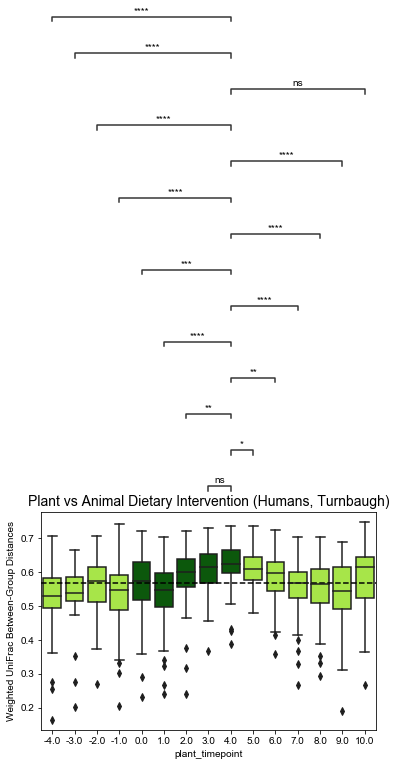

In [35]:
order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
box_pairs = [ ('-4.0', '4.0'),  ('-3.0', '4.0'), ('-1.0', '4.0'), ('-2.0', '4.0'),
             ('0.0', '4.0'), ('4.0', '1.0'), ('4.0', '2.0'), ('4.0', '3.0'), ('4.0', '5.0'),
             ('4.0', '6.0'), ('4.0', '7.0'), ('4.0', '8.0'), ('4.0', '9.0'),
             ('4.0', '10.0'), ]
ax = sns.boxplot(x="plant_timepoint", y="uwUF_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=uwUFdm4, order=order)
add_stat_annotation(ax, data=uwUFdm4, x="plant_timepoint", y="uwUF_distance", order=order,
                    box_pairs=box_pairs, line_offset=0.1,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2);
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.5669485870942566, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/human_uwUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")
#Intervention Day 0-4

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

-4.0 v.s. -3.0: Mann-Whitney-Wilcoxon test two-sided P_val=4.052e-01 U_stat=1.331e+03
-3.0 v.s. -2.0: Mann-Whitney-Wilcoxon test two-sided P_val=2.000e-01 U_stat=9.970e+02
-2.0 v.s. -1.0: Mann-Whitney-Wilcoxon test two-sided P_val=2.386e-01 U_stat=1.771e+03
0.0 v.s. 1.0: Mann-Whitney-Wilcoxon test two-sided P_val=1.956e-01 U_stat=2.207e+03
1.0 v.s. 2.0: Mann-Whitney-Wilcoxon test two-sided P_val=1.414e-03 U_stat=1.351e+03
5.0 v.s. 6.0: Mann-Whitney-Wilcoxon test two-sided P_val=9.303e-02 U_stat=3.376e+03
6.0 v.s. 7.0: Mann-Whitney-Wilcoxon test two-sided P_val=1.625e-02 U_stat=2.432e+03
7.0 v.s. 8.0: Mann-Whitney-Wilcoxon test two-sided P_val=9.033e-01 U_stat=1.751e+03
8.0 v.s. 9.0: Mann-Whitney-Wilcoxon test two-sided P_val=7.561e-01 U_stat=1.786e+03
9.0 v.s. 10.0: Mann-Whitney-Wilcoxon test two-sided P_val=3.372e-02 U_stat

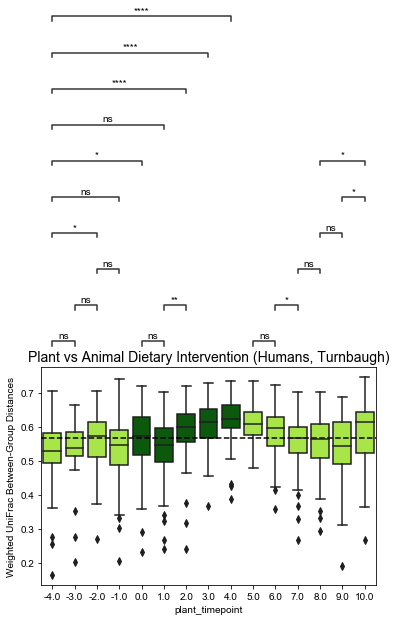

In [45]:
order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
box_pairs = [ ('-4.0', '-3.0'),  ('-4.0', '-2.0'), ('-4.0', '-1.0'), ('-4.0', '0.0'),
             ('-4.0', '1.0'), ('-4.0', '2.0'), ('-4.0', '3.0'), ('-4.0', '4.0'), 
            ('-2.0', '-3.0'), ('-2.0', '-1.0'), 
            ('0.0', '1.0'), ('1.0', '2.0'),
            ('5.0', '6.0'), ('6.0', '7.0'),('7.0', '8.0'), ('8.0', '9.0'), ('9.0', '10.0'), 
            ('8.0', '10.0')]

ax = sns.boxplot(x="plant_timepoint", y="uwUF_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=uwUFdm4, order=order)
add_stat_annotation(ax, data=uwUFdm4, x="plant_timepoint", y="uwUF_distance", order=order,
                    box_pairs=box_pairs, line_offset=0.1, 
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2);
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.5669485870942566, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/human_uwUF_dist_boxplot.svg', dpi=300, bbox_inches="tight")
#Intervention Day 0-4

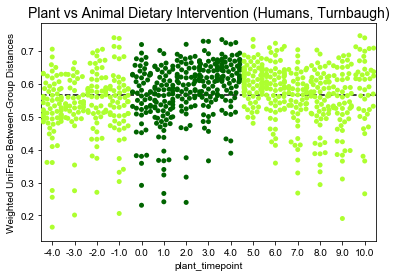

In [31]:
ax = sns.swarmplot(x="plant_timepoint", y="uwUF_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=uwUFdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.5669485870942566, color='k', ls='--')
#Intervention Day 0-4

In [19]:
timez = ['-4.0', '10.0']
uwUFdm_410 = uwUFdm4.loc[uwUFdm4['plant_timepoint'].isin(timez)]
uwUFdm_410.uwUF_distance.values.mean()

0.5479219641035241

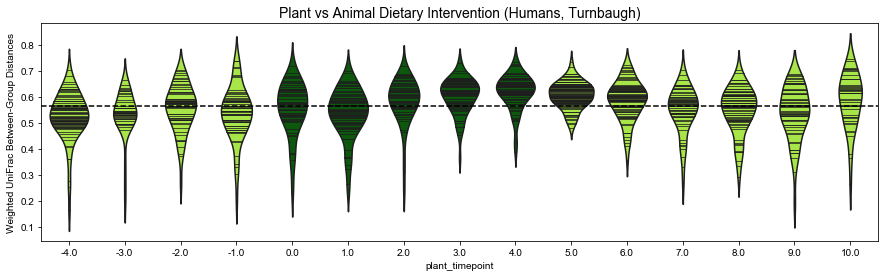

In [32]:
plt.figure(figsize=(15,4))
ax = sns.violinplot(x="plant_timepoint", y="uwUF_distance", palette=['greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'darkgreen', 'darkgreen', 
                                                                'darkgreen', 'darkgreen', 'darkgreen', 'greenyellow', 
                                                                'greenyellow', 'greenyellow', 'greenyellow', 
                                                                'greenyellow', 'greenyellow'],
                 data=uwUFdm4, 
                 order =['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], split=True,
                    scale="count", inner="stick")
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
ax.axhline(0.5669485870942566, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_uwUF_dist_violinplot.svg', dpi=300, bbox_inches="tight")

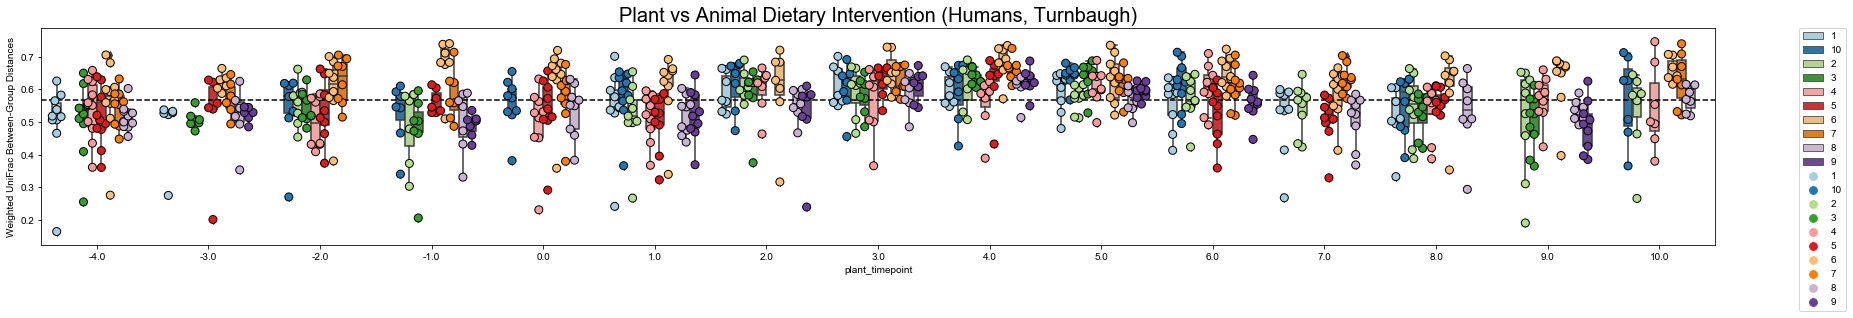

In [33]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="plant_timepoint", y="uwUF_distance", hue='plant_patient',
                  palette='Paired',
                  data=uwUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="plant_timepoint", y="uwUF_distance", hue='plant_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=uwUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.5669485870942566, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_uwUF_dist_boxplot_byP_long_plant.svg', dpi=300, bbox_inches="tight")

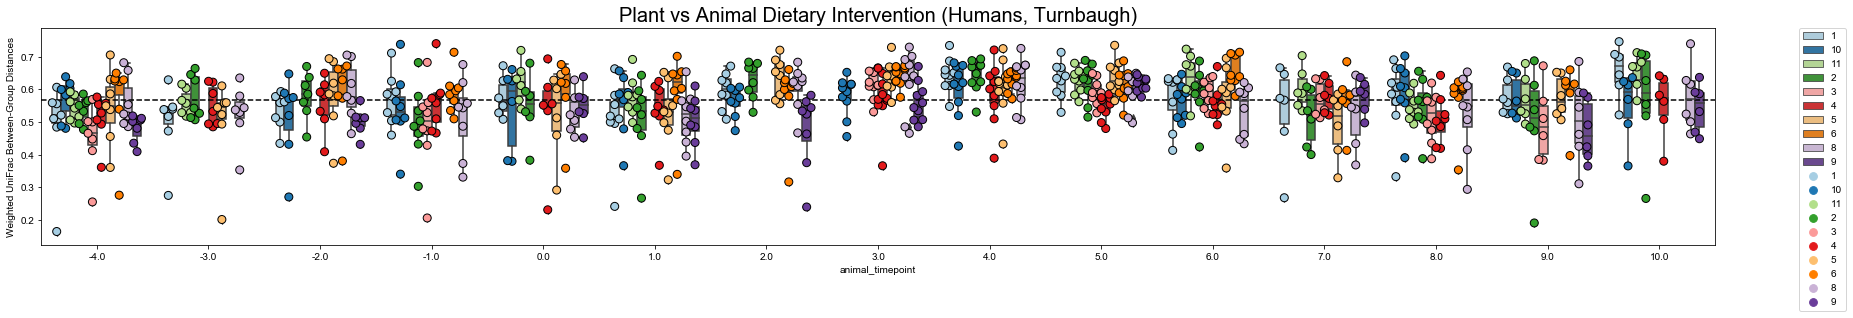

In [34]:
plt.figure(figsize=(30,4))
ax = sns.boxplot(x="animal_timepoint", y="uwUF_distance", hue='animal_patient',
                  palette='Paired',
                  data=uwUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
ax = sns.swarmplot(x="animal_timepoint", y="uwUF_distance", hue='animal_patient', dodge=True,
                  palette='Paired', edgecolor='k', linewidth=1, size=8, 
                  data=uwUFdm4, order=['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=20)
ax.axhline(0.5669485870942566, color='k', ls='--')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/human_uwUF_dist_boxplot_byP_long_animal.svg', dpi=300, bbox_inches="tight")

In [23]:
sorter = ['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
sorterIndex = dict(zip(sorter,range(len(sorter))))
uwUFdm4['Rank'] = uwUFdm4['plant_timepoint'].map(sorterIndex) #already set plant_timepoint = animal_timepoint
uwUFdm5 = uwUFdm4.sort_values(by=['Rank'], axis=0, ascending=True)
uwUFdm5.plant_timepoint.unique()

array(['-4.0', '-3.0', '-2.0', '-1.0', '0.0', '1.0', '2.0', '3.0', '4.0',
       '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'], dtype=object)

<Figure size 1440x288 with 0 Axes>

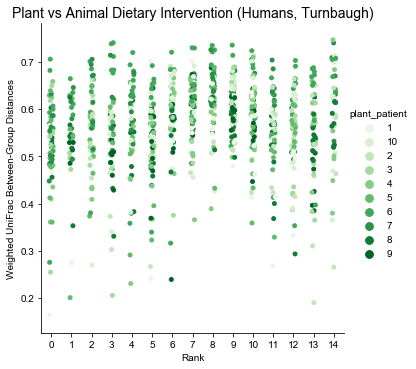

In [24]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="uwUF_distance", hue='plant_patient', palette='Greens', data=uwUFdm5)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

<Figure size 1440x288 with 0 Axes>

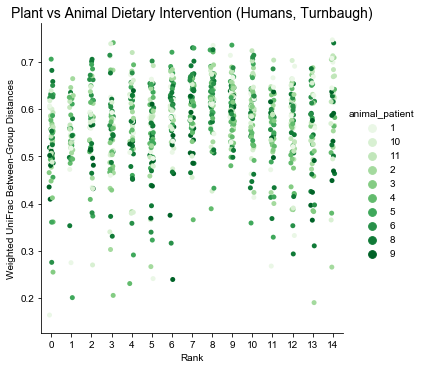

In [25]:
plt.figure(figsize=(20,4))
ax = sns.catplot(x="Rank", y="uwUF_distance", hue='animal_patient', palette='Greens', data=uwUFdm5)
plt.ylabel('Weighted UniFrac Between-Group Distances')
plt.title('Plant vs Animal Dietary Intervention (Humans, Turnbaugh)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

In [26]:
from scipy.stats import wilcoxon
from itertools import combinations

In [27]:
for key in list(combinations(uwUFdm5.plant_timepoint.unique(), 2)):
    x = uwUFdm5[uwUFdm5["plant_timepoint"] == key[0]].uwUF_distance.values
    y = uwUFdm5[uwUFdm5["plant_timepoint"] == key[1]].uwUF_distance.values
    if len(x) == len(y):
        w, p = wilcoxon(x, y)
        print("Combination", key)
        print(p, w)
        print("____________________")
    else:
        print("Combination", key)
        print("Not Even, can't use Wilcoxon")
        print("____________________")
#significant combinations 

Combination ('-4.0', '-3.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '-2.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '-1.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '0.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '1.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '2.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '3.0')
8.20345930058776e-07 400.0
____________________
Combination ('-4.0', '4.0')
5.114467080478872e-09 244.0
____________________
Combination ('-4.0', '5.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '6.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '7.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '8.0')
Not Even, can't use Wilcoxon
____________________
Combination ('-4.0', '9.0')
Not Even, can't use Wilcoxon
_______

In [28]:
from scipy.stats import mannwhitneyu

In [29]:
for key in list(combinations(uwUFdm5.plant_timepoint.unique(), 2)):
    x = uwUFdm5[uwUFdm5["plant_timepoint"] == key[0]].uwUF_distance.values
    y = uwUFdm5[uwUFdm5["plant_timepoint"] == key[1]].uwUF_distance.values
    w, p = mannwhitneyu(x, y)
    print("Combination", key)
    print(p, w)
    print("____________________")

Combination ('-4.0', '-3.0')
0.20259406797003388 1331.0
____________________
Combination ('-4.0', '-2.0')
0.017914967687107212 1532.0
____________________
Combination ('-4.0', '-1.0')
0.24516055213958882 1819.0
____________________
Combination ('-4.0', '0.0')
0.011442587182609695 1438.0
____________________
Combination ('-4.0', '1.0')
0.14763428126118144 2263.0
____________________
Combination ('-4.0', '2.0')
1.3050142734759515e-05 1103.0
____________________
Combination ('-4.0', '3.0')
8.882211140146113e-09 1098.0
____________________
Combination ('-4.0', '4.0')
2.810089540694741e-11 877.0
____________________
Combination ('-4.0', '5.0')
1.346670120066609e-10 1142.0
____________________
Combination ('-4.0', '6.0')
7.007317263054891e-06 1455.0
____________________
Combination ('-4.0', '7.0')
0.02633004729012772 1505.0
____________________
Combination ('-4.0', '8.0')
0.034750486786414465 1832.0
____________________
Combination ('-4.0', '9.0')
0.13108124098880042 1667.0
_________________